This script is used to plot data/DDM fits and conduct model comparison for the DDM fits.

Produces Figures 2a-d,5a-d,S1,S2 and the fit indicies for Table 3.

In [1]:
imatlab_export_fig('print-svg')
set(0,'defaultfigurecolor',[1 1 1])
set(groot,'DefaultAxesFontName','Arial')

% read in data
GFIT_DIR = '../FitGDDM/fits';
GFIT_DATA_DIR = '../FItGDDM/data';
models_block = readtable('model_info_block.csv','ReadVariableNames',true,'Delimiter',',');

%% load in fit data
models_pc = readtable('model_info_precue.csv','Delimiter',',');
models_pt = readtable('model_info_pretone.csv','Delimiter',',');

% read in priorOnly and pretoneOnly data for use in assessing fit
assert(all(strcmp(models_pc.data,models_pc.data{1})))
data_pc = read_data_csv(fullfile(GFIT_DATA_DIR,models_pc.data{1}));
data_pc(isnan(data_pc.choice01),:) = [];

assert(all(strcmp(models_pt.data,models_pt.data{1})))
data_pt = read_data_csv(fullfile(GFIT_DATA_DIR,models_pt.data{1}));
data_pt(isnan(data_pt.choice01),:) = [];


%for display
set(groot,'defaultBarFaceAlpha',0.54)
psych_leg={'low','neutral','high'};
psych_color={'b','k','r'};
jet11 = mat2cell(jet(11),ones(1,11));
jet4 = jet11([2,5,9,11]);
jet4{3} = [128,38,38]./255; %make HL duller red
jet4{2} = [145,13,255]./255; %make LH purply
jet4r = flipud(jet4);
mline_style = '-';
mline_dashed = '-.';
mline_alpha = 1.0;

> In read_data_csv (line 16)
> In read_data_csv (line 17)


# Plot fits and data for each condition

> In read_data_csv (line 16)
> In read_data_csv (line 17)


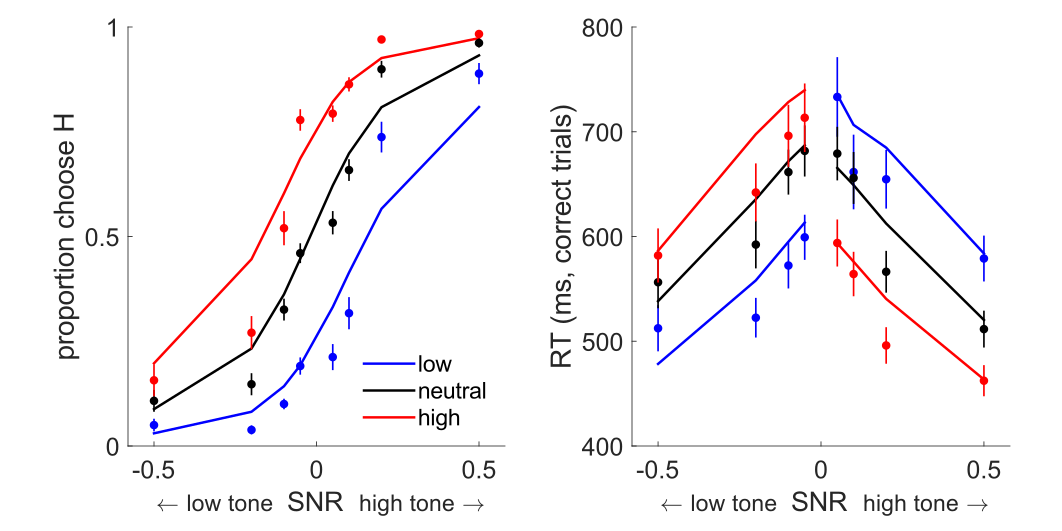

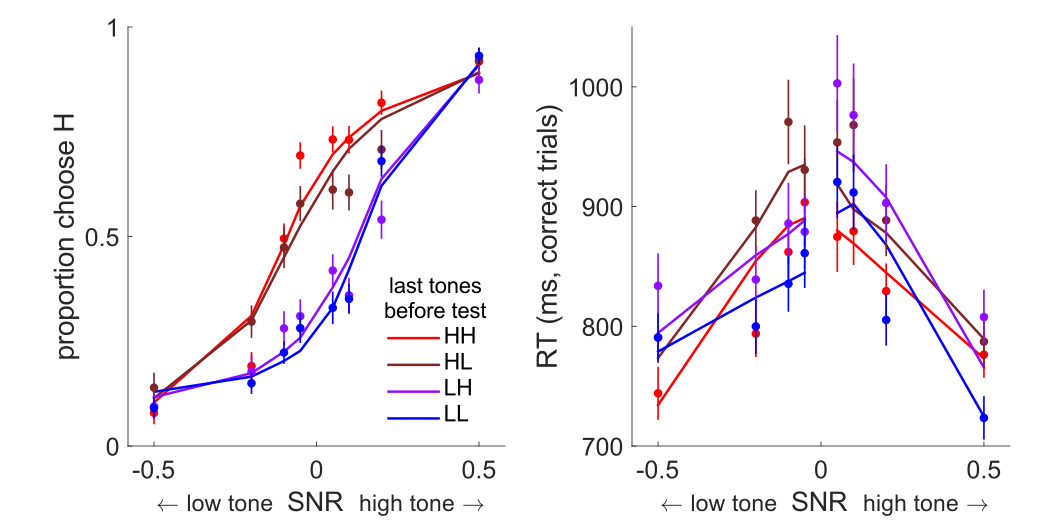

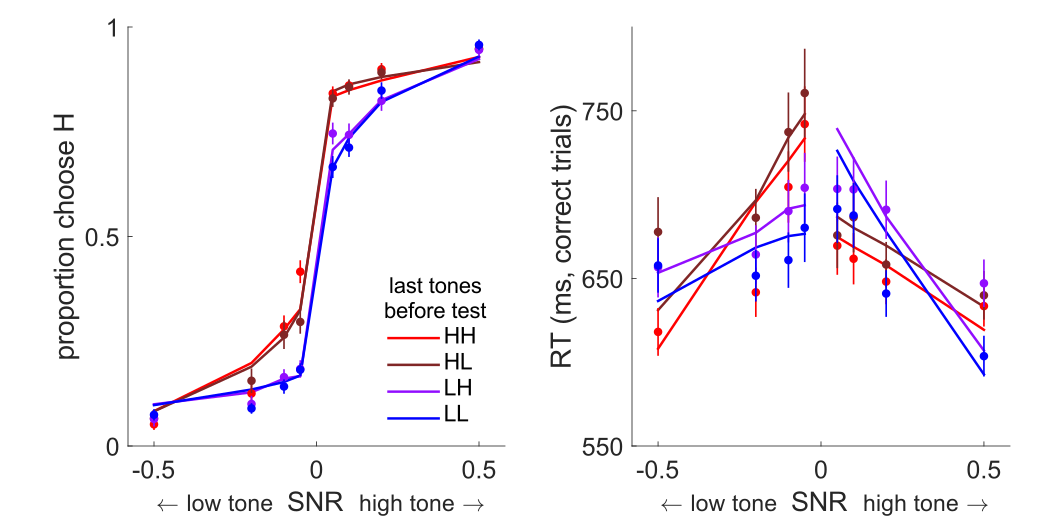

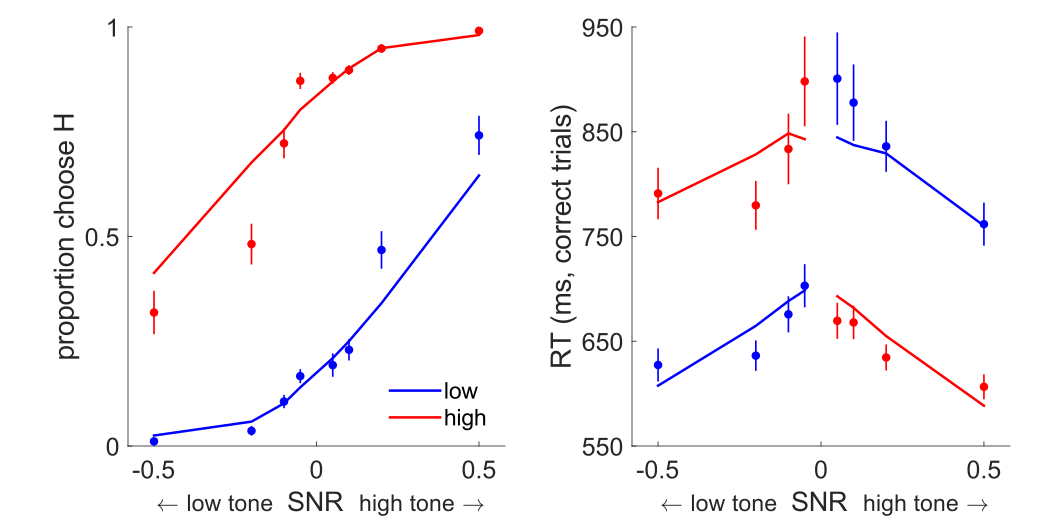

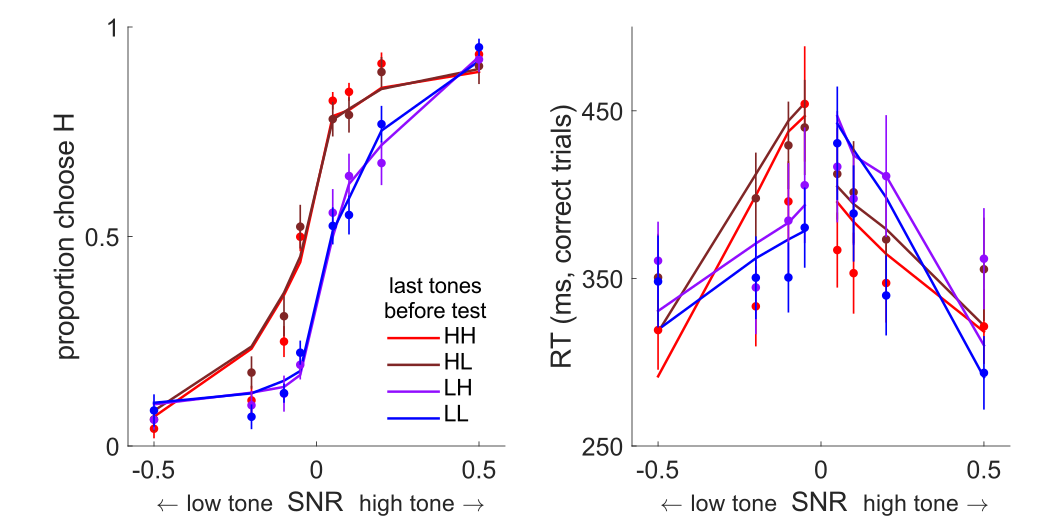

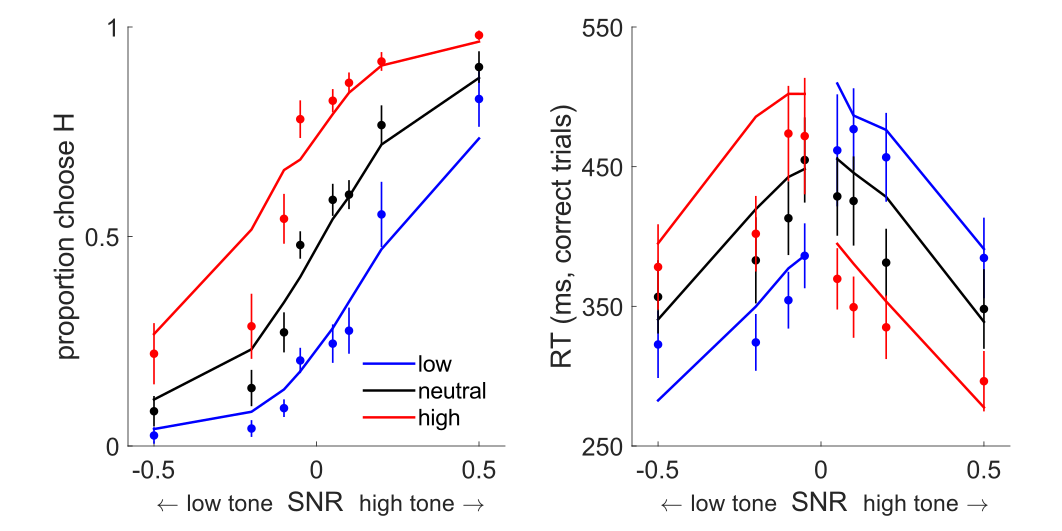

In [2]:
%FINAL
vert=false;
if vert
    this_figdim = [1 1 400 800];
    this_subplot = @(m,n,p) subtightplot(m,n,p,.08,.05,[0.12 0.05]);
else
    this_figdim = [1 1 850 425];
    this_subplot = @(m,n,p) subtightplot(m,n,p,.12,[.16 .05],[0.12 0.05]);
    set(groot,'DefaultAxesFontSize',15)
    set(groot,'DefaultLineLineWidth',1.5)
    set(groot,'DefaultErrorBarLineWidth',1)
    set(groot,'DefaultErrorBarMarkerSize',14)
    set(groot,'DefaultErrorBarCapSize',0)
    set(groot,'DefaultLegendBox','off')
end
psycho_xlab = ' \fontsize{14}\leftarrow low tone  \fontsize{16}SNR  \fontsize{14}high tone \rightarrow';

for m=1:height(models_block)
    model_data = read_data_csv(fullfile(GFIT_DATA_DIR,models_block.data{m}));
    SNR = unique(model_data.SNR);
    subj_predicted = readtable(fullfile(GFIT_DIR,models_block.predicted{m}));
    subj_predicted.mean_RT_corr = subj_predicted.mean_RT_corr.*1000;
    try
        this_data = innerjoin(model_data,subj_predicted,'Keys',{'subject','prior','SNR','bias'},'RightVariables',...
            {'mean_chooseH','mean_RT_corr'});
    catch
        %handles priorOnly/pretoneOnly cases
        if models_block.prior(m)==1
            this_data = innerjoin(model_data,subj_predicted,'Keys',{'subject','prior','SNR'},'RightVariables',...
                {'mean_chooseH','mean_RT_corr'});
        else
            this_data = innerjoin(model_data,subj_predicted,'Keys',{'subject','SNR','bias'},'RightVariables',...
                {'mean_chooseH','mean_RT_corr'});
        end
    end
    
    if models_block.pretone(m)==1       
        %plot pretone effects 
        psycho_ave_ptm = varfun(@nanmean,this_data,'InputVariables',{'choice01','mean_chooseH'},...
            'GroupingVariables',{'subject','ptC','SNR'});
        psycho_ave_ptm_all = summary_stats(psycho_ave_ptm,{'nanmean_choice01','nanmean_mean_chooseH'},...
            {'ptC','SNR'});
        chrono_ave_ptm = varfun(@nanmean,this_data,'InputVariables',{'RT','mean_RT_corr'},...
            'GroupingVariables',{'subject','ptC','success','SNR'});
        chrono_ave_ptm_all = summary_stats(chrono_ave_ptm,{'nanmean_RT','nanmean_mean_RT_corr'},...
            {'ptC','success','SNR'},1);  

        figure('Position',this_figdim);hold on;
        if vert
            this_subplot(2,1,1)
        else
            this_subplot(1,2,1)
        end
        h_psychm = psycho_plot(psycho_ave_ptm_all,...
            'ptC',mline_style,'mean_nanmean_mean_chooseH',[]);
        [h_psychm.Color] = jet4r{:}; 
        h_psych = psycho_plot(psycho_ave_ptm_all,'ptC','.');
        [h_psych.Color] = jet4r{:}; 
        xlabel(psycho_xlab)
        ylabel('proportion choose H')
        ylim([0 1])
        xlim([-.58 .58])
        yticks([0 .5 1])
        if vert
            title(models_block.title{m},'Interpreter','none')
        end
        %legend(psychpt_leg,'Location','SouthEast')
        psychpt_leg = cellstr(unique(model_data.ptC(~isundefined(model_data.ptC))));
        legendflex(psychpt_leg,'anchor',[5 5],'buffer',[-12,10],'box','off', ...
            'title',{'\fontsize{13}last tones';'\fontsize{13}before test'});

        if vert
            this_subplot(2,1,2)
        else
            this_subplot(1,2,2)
        end
        hold on;
        h_chronom = chrono_plot(chrono_ave_ptm_all,'ptC',mline_style,'nanmean_nanmean_mean_RT_corr',[],1);
        chrono_color(h_chronom,jet4r)
        h_chrono = chrono_plot(chrono_ave_ptm_all,'ptC','.','nanmean_nanmean_RT','nansem_nanmean_RT',1);
        chrono_color(h_chrono,jet4r) 
        xlabel(psycho_xlab)
        xlim([-.58 .58])
        ylabel('RT (ms, correct trials)')
        title('');
        this_ytx = yticks(gca);
        %yticks(round(linspace(this_ytx(1),this_ytx(end),4)))
        yticks(this_ytx(1):100:this_ytx(end))
    end
    
    if models_block.prior(m)==1
        %plot prior effects per block
        psycho_ave_priorm= varfun(@nanmean,this_data,'InputVariables',{'choice01','mean_chooseH'},...
            'GroupingVariables',{'subject','prior','SNR'});
        psycho_ave_priorm_all = summary_stats(psycho_ave_priorm,{'nanmean_choice01','nanmean_mean_chooseH'},...
            {'prior','SNR'});
        chrono_ave_priorm = varfun(@nanmean,this_data,'InputVariables',{'RT','mean_RT_corr'},...
            'GroupingVariables',{'subject','prior','success','SNR'});
        chrono_ave_priorm_all = summary_stats(chrono_ave_priorm,{'nanmean_RT','nanmean_mean_RT_corr'},...
            {'prior','success','SNR'},1);  
        
        this_psych_color = psych_color(ismember([-2 0 2],psycho_ave_priorm_all.prior));
        this_psych_leg = psych_leg(ismember([-2 0 2],psycho_ave_priorm_all.prior));

        figure('Position',this_figdim);hold on;
        if vert
            this_subplot(2,1,1)
        else
            this_subplot(1,2,1)
        end
        h_psychm = psycho_plot(psycho_ave_priorm_all,...
            'prior',strcat(mline_style,this_psych_color),'mean_nanmean_mean_chooseH',[]);
        h_psych = psycho_plot(psycho_ave_priorm_all,'prior',strcat('.',this_psych_color));
        xlabel(psycho_xlab)
        ylabel('proportion choose H')
        ylim([0 1])
        xlim([-.58 .58])
        yticks([0 .5 1])
        if vert
            title(models_block.title{m},'Interpreter','none')
        end
        legend(this_psych_leg,'Location','SouthEast')

        if vert
            this_subplot(2,1,2)
        else
            this_subplot(1,2,2)
        end
        hold on;
        h_chronom = chrono_plot(chrono_ave_priorm_all,'prior',strcat(mline_style,this_psych_color),...
            'nanmean_nanmean_mean_RT_corr',[],1);
        h_chrono = chrono_plot(chrono_ave_priorm_all,'prior',strcat('.',this_psych_color),...
            'nanmean_nanmean_RT','nansem_nanmean_RT',1);
        xlabel(psycho_xlab)
        xlim([-.58 .58])
        ylabel('RT (ms, correct trials)')
        title('')
        this_ytx = yticks(gca);
        %yticks(round(linspace(this_ytx(1),this_ytx(end),4)))
        yticks(this_ytx(1):100:this_ytx(end))
    end
      
end
if ~vert
    set(groot,'DefaultAxesFontSize','factory')
    set(groot,'DefaultLineLineWidth','factory')
    set(groot,'DefaultErrorBarLineWidth','factory')
    set(groot,'DefaultErrorBarMarkerSize','factory')
    set(groot,'DefaultErrorBarCapSize','factory')
    set(groot,'DefaultLegendBox','factory')
end

### smooth fits
For figures 2a-b (currently plots logistic/linear fits)

> In read_data_csv (line 16)
> In read_data_csv (line 17)
Set 'VariableNamingRule' to 'preserve' to use the original column headers as table variable names.
> In chrono_plot (line 40)
> In chrono_plot (line 40)


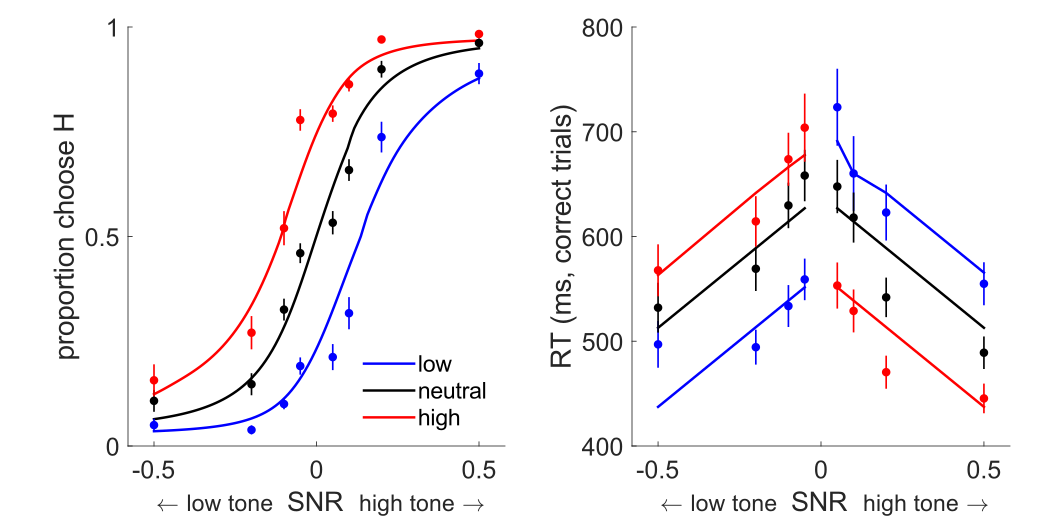

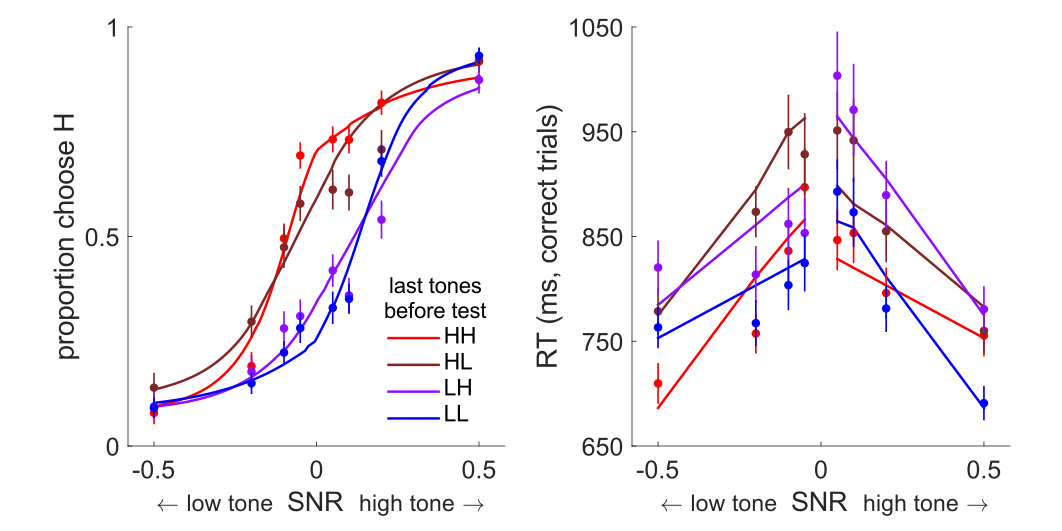

In [3]:
%FINAL
%this has gotten convoluted. Can in theory plot various combinations of things but not currently set up to plot both ddm and
%logistic/linear fits in an elegant way...better to toggle between them.
%Even if plotting logistic fits, this still needs to be run for DDM plotting code below. 
plot_ddm = false;
plot_loglin = true;
RT_func = 'nanmedian'; %'nanmean';

if plot_ddm && endsWith(RT_func,'median')
    warning('DDM fits are mean RTs but data are plotted as within-subject medians!')
end

this_figdim = [1 1 850 425];
this_subplot = @(m,n,p) subtightplot(m,n,p,.12,[.16 .05],[0.12 0.05]);
set(groot,'DefaultAxesFontSize',15)
set(groot,'DefaultLineLineWidth',1.5)
set(groot,'DefaultErrorBarLineWidth',1)
set(groot,'DefaultErrorBarMarkerSize',14)
set(groot,'DefaultErrorBarCapSize',0)
set(groot,'DefaultLegendBox','off')

psycho_xlab = ' \fontsize{14}\leftarrow low tone  \fontsize{16}SNR  \fontsize{14}high tone \rightarrow';
smooth_alpha = 1.0; %0.7; %mline_alpha;
linewidth_reduc = 1.5; %2;
logist_lines = mline_style; %mline_dashed;
fullm = struct();
for m=1:2 %height(models_block)
    this_data = read_data_csv(fullfile(GFIT_DATA_DIR,models_block.data{m}));
    %%%sum(isnan(this_data.choice01))
    this_data(isnan(this_data.choice01),:) = []; %remove missing trials
    %%%bar = this_data;
    SNR = unique(this_data.SNR);
    subj_predicted = readtable(fullfile(GFIT_DIR,models_block.predicted_smooth{m}));
    subj_predicted.mean_RT_corr = subj_predicted.mean_RT_corr.*1000;
    subj_predicted.success = ones(height(subj_predicted),1); %not sure this is necessary but going w/ it to change as little as possible

    
    if models_block.pretone(m)==1
        %attach ptC column to predictions
        ptC_vals = unique(this_data(:,{'subject','bias','ptC','isH'}),'rows');
        subj_predicted = join(subj_predicted,ptC_vals,'Keys',{'subject','bias','isH'},'RightVariables',...
            {'ptC'});
            
        %get actual proprotions of each pretone seq per subject
        subj = unique(this_data.subject);
        ptG = [];
        for s=1:length(subj)
            this_ptG = groupcounts(this_data(strcmp(this_data.subject,subj{s}),{'bias','isH'}),...
                {'bias','isH'});
            this_ptG.subject = repmat(subj(s),height(this_ptG),1);
            ptG = [ptG;this_ptG];
        end
        ptG.Percent = ptG.Percent./100;
        subj_predicted = join(subj_predicted,ptG,'Keys',{'subject','bias','isH'},...
            'RightVariables','Percent');
            
        %average data effects
        psycho_ave_ptm = varfun(@nanmean,this_data,'InputVariables',{'choice01'},...
            'GroupingVariables',{'subject','ptC','SNR'});
        psycho_ave_ptm_all = summary_stats(psycho_ave_ptm,{'nanmean_choice01'},...
            {'ptC','SNR'});
        chrono_ave_ptm = varfun(str2func(RT_func),this_data,'InputVariables',{'RT'},...
            'GroupingVariables',{'subject','ptC','success','SNR'});
        chrono_ave_ptm_all = summary_stats(chrono_ave_ptm,{[RT_func '_RT']},...
            {'ptC','success','SNR'},1);
            
        %average predicted effects
        %psycho_ave_ptmp = varfun(@nanmean,subj_predicted,'InputVariables',{'mean_chooseH'},...
        %    'GroupingVariables',{'subject','ptC','SNR'});
        %this version calculates weighted average according to actual proportions of 
        %trials for each pretone sequence. This gives the same result as
        %straight average for ptlen <= 2.
        psycho_ave_ptmp = rowfun(@(x,w) sum(x.*w)./sum(w),subj_predicted,...
            'InputVariables',{'mean_chooseH','Percent'},...
            'GroupingVariables',{'subject','ptC','SNR'},...
            'OutputVariableName','nanmean_mean_chooseH');
        psycho_ave_ptmp_all = summary_stats(psycho_ave_ptmp,{'nanmean_mean_chooseH'},...
            {'ptC','SNR'});
        %chrono_ave_ptmp = varfun(@nanmean,subj_predicted,'InputVariables',{'mean_RT_corr'},...
        %    'GroupingVariables',{'subject','ptC','success','SNR'});
        chrono_ave_ptmp = rowfun(@(x,w) sum(x.*w)./sum(w),subj_predicted,...
            'InputVariables',{'mean_RT_corr','Percent'},...
            'GroupingVariables',{'subject','ptC','success','SNR'},...
            'OutputVariableName','nanmean_mean_RT_corr');
        chrono_ave_ptmp_all = summary_stats(chrono_ave_ptmp,{'nanmean_mean_RT_corr'},...
            {'ptC','success','SNR'},1);             
                    
        %save full model averages for later plotting
        fullm.pretone.psycho = psycho_ave_ptmp_all;
        fullm.pretone.chrono = chrono_ave_ptmp_all;
            
        %also load logistic/linear fits
        if plot_loglin
            F = load(models_block.logistic{m});
            logistic_ave_all = F.psycho_fit_ave_out(strcmp(F.psycho_fit_ave_out.mname,'full'),:);
            clear F
            
            RT_pred_ave = readtable(models_block.lin_RT_pred{m});
        end
            

        figure('Position',this_figdim);hold on;
        this_subplot(1,2,1)
        
        if plot_ddm
            h_psychm = psycho_plot(psycho_ave_ptmp_all,...
                'ptC',mline_style,'mean_nanmean_mean_chooseH',[]);
            [h_psychm.Color] = jet4r{:};
        end
        if plot_loglin
            h_logist = psycho_plot(logistic_ave_all,...
                'ptC',logist_lines,'mean_mean_pred',[]);
            logist_color=cellfun(@(x) [x smooth_alpha],jet4r,'UniformOutput',false);
            [h_logist.Color] = logist_color{:};
            [h_logist.LineWidth] = deal(linewidth_reduc);
        end
        h_psych = psycho_plot(psycho_ave_ptm_all,'ptC','.');
        [h_psych.Color] = jet4r{:};
        xlabel(psycho_xlab)
        ylabel('proportion choose H')
        ylim([0 1])
        xlim([-.58 .58])
        yticks([0 .5 1])
        %title(models_block.title{m},'Interpreter','none')
        %legend(psychpt_leg,'Location','SouthEast')
        psychpt_leg = cellstr(unique(this_data.ptC(~isundefined(this_data.ptC))));
        legendflex(psychpt_leg,'anchor',[5 5],'buffer',[-12,10],'box','off', ...
            'title',{'\fontsize{13}last tones';'\fontsize{13}before test'});

        this_subplot(1,2,2)
        hold on;
        if plot_ddm
            h_chronom = chrono_plot(chrono_ave_ptmp_all,'ptC',mline_style,'nanmean_nanmean_mean_RT_corr',[],1);
            chrono_color(h_chronom,jet4r)
        end
        if plot_loglin
            h_chronol = chrono_plot(RT_pred_ave,'ptC',mline_style,'RT_pred',[],1);
            chrono_color(h_chronol,jet4r)
        end
        h_chrono = chrono_plot(chrono_ave_ptm_all,'ptC','.',['nanmean_' RT_func '_RT'],['nansem_' RT_func '_RT'],1);
        chrono_color(h_chrono,jet4r) 
        xlabel(psycho_xlab)
        xlim([-.58 .58])
        ylabel('RT (ms, correct trials)')
        title('');
        this_ytx = yticks(gca);
        %yticks(round(linspace(this_ytx(1),this_ytx(end),4)))
        yticks(this_ytx(1):100:this_ytx(end))
    end
    
    if models_block.prior(m)==1
        %average data effects
        psycho_ave_priorm= varfun(@nanmean,this_data,'InputVariables',{'choice01'},...
            'GroupingVariables',{'subject','prior','SNR'});
        psycho_ave_priorm_all = summary_stats(psycho_ave_priorm,{'nanmean_choice01'},...
            {'prior','SNR'});
        chrono_ave_priorm = varfun(str2func(RT_func),this_data,'InputVariables',{'RT'},...
            'GroupingVariables',{'subject','prior','success','SNR'});
        chrono_ave_priorm_all = summary_stats(chrono_ave_priorm,{[RT_func '_RT']},...
            {'prior','success','SNR'},1);
            
        %average predicted effects
        psycho_ave_priormp= varfun(@nanmean,subj_predicted,'InputVariables',{'mean_chooseH'},...
            'GroupingVariables',{'subject','prior','SNR'});
        psycho_ave_priormp_all = summary_stats(psycho_ave_priormp,{'nanmean_mean_chooseH'},...
            {'prior','SNR'});
        chrono_ave_priormp = varfun(@nanmean,subj_predicted,'InputVariables',{'mean_RT_corr'},...
            'GroupingVariables',{'subject','prior','success','SNR'});
        chrono_ave_priormp_all = summary_stats(chrono_ave_priormp,{'nanmean_mean_RT_corr'},...
            {'prior','success','SNR'},1);
            
        %save full model averages for later plotting
        fullm.precue.psycho = psycho_ave_priormp_all;
        fullm.precue.chrono = chrono_ave_priormp_all;
            
        %also load logistic fits
        if plot_loglin
            F = load(models_block.logistic{m});
            logistic_ave_all = F.psycho_fit_ave_out(strcmp(F.psycho_fit_ave_out.mname,'shared slopes'),:);
            clear F
            
            RT_pred_ave = readtable(models_block.lin_RT_pred{m});
        end
                
        this_psych_color = psych_color(ismember([-2 0 2],psycho_ave_priorm_all.prior));
        this_psych_leg = psych_leg(ismember([-2 0 2],psycho_ave_priorm_all.prior));

        figure('Position',this_figdim);hold on;
        this_subplot(1,2,1)
        
        if plot_ddm
            h_psychm = psycho_plot(psycho_ave_priormp_all,...
                'prior',strcat(mline_style,this_psych_color),'mean_nanmean_mean_chooseH',[]);
        end
        if plot_loglin
            h_logist = psycho_plot(logistic_ave_all,...
                'prior',strcat(logist_lines,this_psych_color),'mean_mean_pred',[]);
            logist_color={h_logist.Color};
            logist_color=cellfun(@(x) [x smooth_alpha],logist_color,'UniformOutput',false);
            [h_logist.Color] = logist_color{:};
            [h_logist.LineWidth] = deal(linewidth_reduc);
        end
        h_psych = psycho_plot(psycho_ave_priorm_all,'prior',strcat('.',this_psych_color));
        xlabel(psycho_xlab)
        ylabel('proportion choose H')
        ylim([0 1])
        xlim([-.58 .58])
        yticks([0 .5 1])
        %title(models_block.title{m},'Interpreter','none')
        legend(this_psych_leg,'Location','SouthEast')


        this_subplot(1,2,2)
        hold on;
        if plot_ddm
            h_chronom = chrono_plot(chrono_ave_priormp_all,'prior',strcat(mline_style,this_psych_color),...
                'nanmean_nanmean_mean_RT_corr',[],1);
        end
        if plot_loglin
            h_chronol = chrono_plot(RT_pred_ave,'prior',strcat(mline_style,this_psych_color),...
                'RT_pred',[],1);
        end
        h_chrono = chrono_plot(chrono_ave_priorm_all,'prior',strcat('.',this_psych_color),...
            ['nanmean_' RT_func '_RT'],['nansem_' RT_func '_RT'],1);
        xlabel(psycho_xlab)
        xlim([-.58 .58])
        ylabel('RT (ms, correct trials)')
        title('')
        this_ytx = yticks(gca);
        %yticks(round(linspace(this_ytx(1),this_ytx(end),4)))
        yticks(this_ytx(1):100:this_ytx(end))
    end
   
end

set(groot,'DefaultAxesFontSize','factory')
set(groot,'DefaultLineLineWidth','factory')
set(groot,'DefaultErrorBarLineWidth','factory')
set(groot,'DefaultErrorBarMarkerSize','factory')
set(groot,'DefaultErrorBarCapSize','factory')
set(groot,'DefaultLegendBox','factory')


## interaction plots
For figures 2c-d (currently plots data only)

> In read_data_csv (line 16)
> In read_data_csv (line 17)


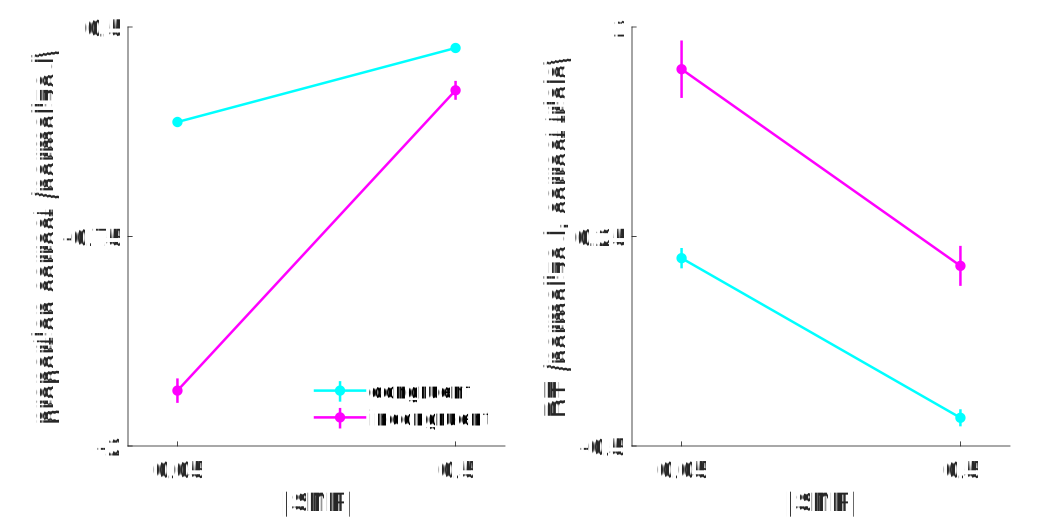

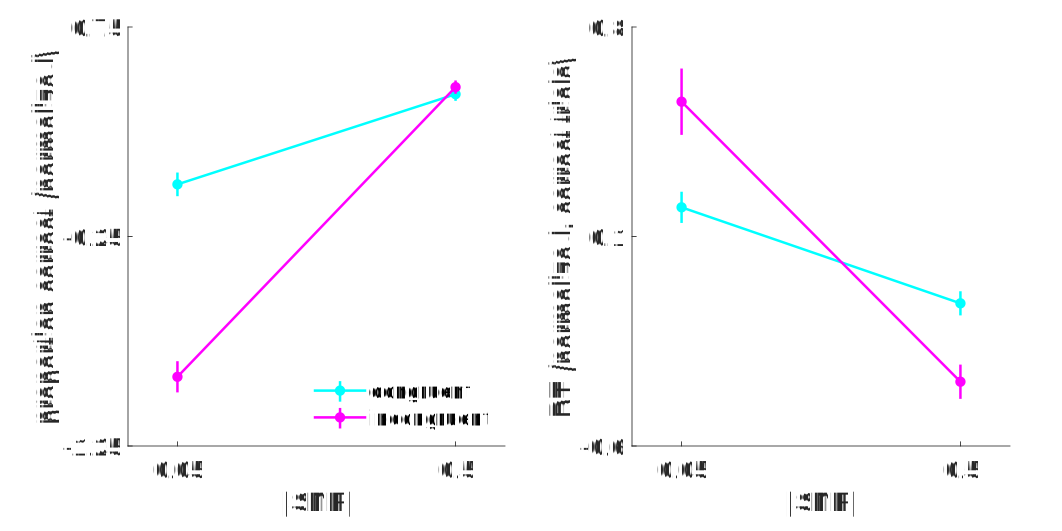

In [4]:
%interaction plot as func of congruent/incongruent

%FINAL

normalize = true; %toggle normalization of RTs (zscore)
plot_fits = false; %(toggle overlaying DDM fits over behavioral data)
plot_logist = false; %plot the logistic fits
plot_skinny = false; %toggle whether plots are full width or skinny

line_specs = {'c','m'};
line_specsb = {[0 1 1 0.5],[1 0 1 0.5]};

if plot_skinny
    this_figdim = [1 1 600 425];
else
    this_figdim = [1 1 850 425];
end
this_subplot = @(m,n,p) subtightplot(m,n,p,.12,[.16 .05],[0.12 0.05]);
set(groot,'DefaultAxesFontSize',15)
set(groot,'DefaultLineLineWidth',1.5)
set(groot,'DefaultErrorBarLineWidth',1.5)
set(groot,'DefaultErrorBarMarkerSize',16)
set(groot,'DefaultErrorBarCapSize',0)
set(groot,'DefaultLegendBox','off')
psycho_xlab = '\fontsize{16}|SNR|';
psycho_int_ylab = 'proportion correct (normalized)';
chrono_int_ylab = 'RT (normalized, correct trials)';
con_leg = {'congruent','incongruent'};
intline_style = '.:';
logist_linewidth = 2;
smooth_alpha = 0.7;
logist_vars = {'shared slopes','base';
                'full','no interaction'};
logist_lines = {'-',mline_dashed};
for m=1:2
    model_data = read_data_csv(fullfile(GFIT_DATA_DIR,models_block.data{m}));
    SNR = unique(model_data.SNR);
    subj_predicted = readtable(fullfile(GFIT_DIR,models_block.predicted{m}));
    subj_predicted.mean_RT_corr = subj_predicted.mean_RT_corr.*1000;
    
    %restrict data to lowest/highest SNR
    model_data = model_data(ismember(abs(model_data.SNR),[0.05,0.5]),:);
    model_data.aSNR = abs(model_data.SNR);
    
    if models_block.prior(m)==1
        this_data = innerjoin(model_data,subj_predicted,'Keys',{'subject','prior','SNR'},'RightVariables',...
            {'mean_chooseH','mean_RT_corr'});
    else
        this_data = innerjoin(model_data,subj_predicted,'Keys',{'subject','SNR','bias'},'RightVariables',...
            {'mean_chooseH','mean_RT_corr'});
    end
    
  
    %also logistic
    this_data = this_data(~isnan(this_data.choice01),:);
    F = load(models_block.logist_pred{m});
    logist_pred = F.pred_out;clear F;
    logist_pred(~ismember(logist_pred.mname,logist_vars(m,:)),:) = [];
    logist_pred = unstack(logist_pred,'choice_pred','mname','VariableNamingRule','preserve');
    this_data = join(this_data,logist_pred,'Keys',{'subject','trialID'});
    
    logist_vars_ave = strcat('nanmean_',logist_vars(m,:));
    logist_vars_all = strcat('mean_',logist_vars_ave);

    %in order to code choices in terms of congruence, we need to flip the isH==0 choices 
    %(essentially changing it to correct/incorrect coding)
    this_data.choice01 = this_data.success; %this is hacky but is same as flipping the isH==0 choices. 
    this_data.mean_chooseH(this_data.isH==0) = 1-this_data.mean_chooseH(this_data.isH==0);
    this_data{this_data.isH==0,logist_vars(m,:)} = 1-this_data{this_data.isH==0,logist_vars(m,:)};
    
    if plot_logist
        data_connector = '.';
    else
        data_connector = intline_style;
    end
    
    if models_block.pretone(m)==1       
        %plot pretone effects (restrict to HH/LL)
       
        this_data = this_data(ismember(this_data.ptC,{'HH','LL'}),:);
        this_data.ptC = removecats(this_data.ptC);
        
        this_data.congruent = 1-double((this_data.isH == 1 & this_data.ptC=='HH') | ...
            (this_data.isH==0 & this_data.ptC=='LL')); %need to reverse code this for ordering in graph
            
        if normalize
            norms = [];
            this_subj = unique(this_data.subject);
            for i=1:length(this_subj)
                %normalize choice
                [this_zchoice,this_muC,this_sigmaC] = zscore(this_data.choice01(strcmp(this_data.subject,this_subj{i})));
                this_data.choice01(strcmp(this_data.subject,this_subj{i})) = this_zchoice;
                this_data.mean_chooseH(strcmp(this_data.subject,this_subj{i})) = ...
                    (this_data.mean_chooseH(strcmp(this_data.subject,this_subj{i})) - this_muC) ./ this_sigmaC;
                this_data{strcmp(this_data.subject,this_subj{i}),logist_vars(m,:)} = ...
                    (this_data{strcmp(this_data.subject,this_subj{i}),logist_vars(m,:)} - this_muC) ./ this_sigmaC;
                
                %normalize RT
                [this_zRT,this_muRT,this_sigmaRT] = zscore(this_data.RT(strcmp(this_data.subject,this_subj{i})));
                this_data.RT(strcmp(this_data.subject,this_subj{i})) = this_zRT;
                this_data.mean_RT_corr(strcmp(this_data.subject,this_subj{i})) = ...
                    (this_data.mean_RT_corr(strcmp(this_data.subject,this_subj{i})) - this_muRT) ./ this_sigmaRT;
                
                %save norms for normalizing bias only fits...urg
                this_norm = table(this_subj(i),this_muC,this_sigmaC,this_muRT,this_sigmaRT,...
                    'VariableNames',{'subject','muC','sigmaC','muRT','sigmaRT'});
                norms = [norms;this_norm];
            end
        end
        
        psycho_ave_ptm = varfun(@nanmean,this_data,...
            'InputVariables',[{'choice01','mean_chooseH'},logist_vars(m,:)],...
            'GroupingVariables',{'subject','congruent','aSNR'});
        psycho_ave_ptm_all = summary_stats(psycho_ave_ptm,...
            [{'nanmean_choice01','nanmean_mean_chooseH'},logist_vars_ave],...
            {'congruent','aSNR'});
        chrono_ave_ptm = varfun(@nanmean,this_data,'InputVariables',{'RT','mean_RT_corr'},...
            'GroupingVariables',{'subject','congruent','success','aSNR'});
        chrono_ave_ptm_all = summary_stats(chrono_ave_ptm,{'nanmean_RT','nanmean_mean_RT_corr'},...
            {'congruent','success','aSNR'},1);  
            
        % separately load in and plot bias-only model (this code gets very redundant...:-())
        if plot_fits && strcmp(models_block.title{m},'pretoneOnly')
            biasOnly = readtable(fullfile(GFIT_DIR,models_pt.predicted{strcmp(models_pt.title,'bias only')}));
            biasOnly.Properties.VariableNames({'mean_chooseH','mean_RT_corr'}) = {'mean_chooseHb','mean_RT_corrb'};
            biasOnly.mean_RT_corrb = biasOnly.mean_RT_corrb.*1000;
            biasOnly.mean_chooseHb(biasOnly.isH==0) = 1-biasOnly.mean_chooseHb(biasOnly.isH==0);
            %head(biasOnly)
            this_data = innerjoin(this_data,biasOnly,'Keys',{'subject','SNR','bias'},'RightVariables',...
                {'mean_chooseHb','mean_RT_corrb'});
            
            if normalize
                for i=1:length(this_subj)
                    this_muC = norms.muC(strcmp(norms.subject,this_subj{i}));
                    this_sigmaC = norms.sigmaC(strcmp(norms.subject,this_subj{i}));
                    this_data.mean_chooseHb(strcmp(this_data.subject,this_subj{i})) = ...
                        (this_data.mean_chooseHb(strcmp(this_data.subject,this_subj{i})) - this_muC) ./ this_sigmaC;
                        
                    this_muRT = norms.muRT(strcmp(norms.subject,this_subj{i}));
                    this_sigmaRT = norms.sigmaRT(strcmp(norms.subject,this_subj{i}));
                    this_data.mean_RT_corrb(strcmp(this_data.subject,this_subj{i})) = ...
                        (this_data.mean_RT_corrb(strcmp(this_data.subject,this_subj{i})) - this_muRT) ./ this_sigmaRT;
                end
            end
                
            psycho_ave_b = varfun(@nanmean,this_data,...
                'InputVariables',{'mean_chooseHb'},...
                'GroupingVariables',{'subject','congruent','aSNR'});
            psycho_ave_b_all = summary_stats(psycho_ave_b,{'nanmean_mean_chooseHb'},...
                {'congruent','aSNR'});
            chrono_ave_b = varfun(@nanmean,this_data,'InputVariables',{'mean_RT_corrb'},...
                'GroupingVariables',{'subject','congruent','success','aSNR'});
            chrono_ave_b_all = summary_stats(chrono_ave_b,{'nanmean_mean_RT_corrb'},...
                {'congruent','success','aSNR'},1);  
        end

        figure('Position',this_figdim);hold on;
        this_subplot(1,2,1)
        if plot_fits
            h_psychm = psycho_plot(psycho_ave_ptm_all,...
                'congruent',mline_style,'mean_nanmean_mean_chooseH',[],[],'aSNR');
            [h_psychm.Color] = line_specs{:};
            h_psychmb = psycho_plot(psycho_ave_b_all,...
                'congruent','--','mean_nanmean_mean_chooseHb',[],[],'aSNR');
            [h_psychmb.Color] = line_specsb{:}; 
        end
        if plot_logist
            for l=1:length(logist_vars_all)
                h_logist = psycho_plot(psycho_ave_ptm_all,...
                    'congruent',strcat(logist_lines{l},line_specs),logist_vars_all{l},[],[],'aSNR');
                logist_color={h_logist.Color};
                logist_color=cellfun(@(x) [x smooth_alpha],logist_color,'UniformOutput',false);
                [h_logist.Color] = logist_color{:};
                [h_logist.LineWidth] = deal(logist_linewidth);                
            end
        end
        h_psych = psycho_plot(psycho_ave_ptm_all,'congruent',data_connector,...
            'mean_nanmean_choice01','sem_nanmean_choice01',[],'aSNR');
        [h_psych.Color] = line_specs{:}; 
        xlabel(psycho_xlab)
        ylabel(psycho_int_ylab)
        if normalize
            ylim([-1.25 0.75])
            yticks([-1.25 -0.25 0.75])
        else
            ylim([0 1])
            yticks([0 .5 1])
        end
        xticks([0.05 0.5])
        xlim([-.03 .58])
        legend(con_leg,'Location','SouthEast')
        %psychpt_leg = cellstr(unique(this_data.ptC(~isundefined(this_data.ptC))));
        %legendflex(psychpt_leg,'anchor',[5 5],'buffer',[-12,10], ...
        %    'title',{'\fontsize{13}last tones';'\fontsize{13}before test'});

        this_subplot(1,2,2)
        hold on;
        if plot_fits
            h_chronob = chrono_plot(chrono_ave_b_all,'congruent','--','nanmean_nanmean_mean_RT_corrb',[],1,[],[],'aSNR');
            [h_chronob.Color] = line_specsb{:};
            h_chronom = chrono_plot(chrono_ave_ptm_all,'congruent',mline_style,'nanmean_nanmean_mean_RT_corr',[],1,[],[],'aSNR');
            [h_chronom.Color] = line_specs{:};
        end
        h_chrono = chrono_plot(chrono_ave_ptm_all,'congruent',intline_style,'nanmean_nanmean_RT','nansem_nanmean_RT',1,[],[],'aSNR');
        chrono_color(h_chrono,line_specs)
        xlabel(psycho_xlab)
        %xlim([-.58 .58])
        ylabel(chrono_int_ylab)
        title('');
        if normalize
            yticks([-0.6 .1 .8]);
        else
            this_ytx = yticks(gca);
            %%%yticks(this_ytx(1):100:this_ytx(end))
        end
        xticks([0.05 0.5]);
        xlim([-.03 .58])
    end
    
    if models_block.prior(m)==1
        %restrict to low/high
        this_data(this_data.prior==0,:) = [];
        
        this_data.congruent = 1-double((this_data.isH == 1 & this_data.prior==2) | ...
            (this_data.isH==0 & this_data.prior==-2)); %need to reverse code this for ordering in graph
        
        if normalize
            norms = [];
            this_subj = unique(this_data.subject);
            for i=1:length(this_subj)
                %normalize choice
                [this_zchoice,this_muC,this_sigmaC] = zscore(this_data.choice01(strcmp(this_data.subject,this_subj{i})));
                this_data.choice01(strcmp(this_data.subject,this_subj{i})) = this_zchoice;
                this_data.mean_chooseH(strcmp(this_data.subject,this_subj{i})) = ...
                    (this_data.mean_chooseH(strcmp(this_data.subject,this_subj{i})) - this_muC) ./ this_sigmaC;
                this_data{strcmp(this_data.subject,this_subj{i}),logist_vars(m,:)} = ...
                    (this_data{strcmp(this_data.subject,this_subj{i}),logist_vars(m,:)} - this_muC) ./ this_sigmaC;
                
                %normalize RT
                [this_zRT,this_muRT,this_sigmaRT] = zscore(this_data.RT(strcmp(this_data.subject,this_subj{i})));
                this_data.RT(strcmp(this_data.subject,this_subj{i})) = this_zRT;
                this_data.mean_RT_corr(strcmp(this_data.subject,this_subj{i})) = ...
                    (this_data.mean_RT_corr(strcmp(this_data.subject,this_subj{i})) - this_muRT) ./ this_sigmaRT;
                
                %save norms for normalizing bias only fits...urg
                %this_norm = table(this_subj(i),this_muC,this_sigmaC,this_muRT,this_sigmaRT,...
                %    'VariableNames',{'subject','muC','sigmaC','muRT','sigmaRT'});
                %norms = [norms;this_norm];
            end
        end
        
        %plot prior effects per block
        psycho_ave_priorm= varfun(@nanmean,this_data,'InputVariables',...
            [{'choice01','mean_chooseH'},logist_vars{m,:}],...
            'GroupingVariables',{'subject','congruent','aSNR'});
        psycho_ave_priorm_all = summary_stats(psycho_ave_priorm,...
            [{'nanmean_choice01','nanmean_mean_chooseH'},logist_vars_ave],...
            {'congruent','aSNR'});
        chrono_ave_priorm = varfun(@nanmean,this_data,'InputVariables',{'RT','mean_RT_corr'},...
            'GroupingVariables',{'subject','congruent','success','aSNR'});
        chrono_ave_priorm_all = summary_stats(chrono_ave_priorm,{'nanmean_RT','nanmean_mean_RT_corr'},...
            {'congruent','success','aSNR'},1);  
        

        
        %this_psych_color = psych_color(ismember([-2 0 2],psycho_ave_priorm_all.prior));
        %this_psych_leg = psych_leg(ismember([-2 0 2],psycho_ave_priorm_all.prior));

        figure('Position',this_figdim);hold on;
        this_subplot(1,2,1)
        if plot_fits
            h_psychm = psycho_plot(psycho_ave_priorm_all,...
                'congruent',strcat(mline_style,line_specs),'mean_nanmean_mean_chooseH',[],[],'aSNR');
        end
        if plot_logist
            for l=1:length(logist_vars_all)
                h_logist = psycho_plot(psycho_ave_priorm_all,...
                    'congruent',strcat(logist_lines{l},line_specs),logist_vars_all{l},[],[],'aSNR');
                logist_color={h_logist.Color};
                logist_color=cellfun(@(x) [x smooth_alpha],logist_color,'UniformOutput',false);
                [h_logist.Color] = logist_color{:};
                [h_logist.LineWidth] = deal(logist_linewidth);                
            end
        end
        h_psych = psycho_plot(psycho_ave_priorm_all,'congruent',strcat(data_connector,line_specs),'mean_nanmean_choice01',...
            'sem_nanmean_choice01',[],'aSNR');
        xlabel(psycho_xlab)
        ylabel(psycho_int_ylab)

        if normalize
            ylim([-2 0.5])
            yticks([-2 -0.75 0.5])
        else
            ylim([0 1])
            yticks([0 .5 1])
        end
        xticks([0.05 0.5])
        xlim([-.03 .58])
        legend(con_leg,'Location','SouthEast')

        this_subplot(1,2,2)
        hold on;
        if plot_fits
            h_chronom = chrono_plot(chrono_ave_priorm_all,'congruent',strcat(mline_style,line_specs),...
                'nanmean_nanmean_mean_RT_corr',[],1,[],[],'aSNR');
        end
        h_chrono = chrono_plot(chrono_ave_priorm_all,'congruent',strcat(intline_style,line_specs),...
            'nanmean_nanmean_RT','nansem_nanmean_RT',1,[],[],'aSNR');
        xlabel(psycho_xlab)
        ylabel(chrono_int_ylab)
        title('')
        if normalize
            yticks([-0.5 0.25 1])
        else
            this_ytx = yticks(gca);
            yticks(this_ytx(1):100:this_ytx(end))
        end
        xlim([-.03 .58])
        xticks([0.05 0.5]);
    end
   
end

set(groot,'DefaultAxesFontSize','factory')
set(groot,'DefaultLineLineWidth','factory')
set(groot,'DefaultErrorBarLineWidth','factory')
set(groot,'DefaultErrorBarMarkerSize','factory')
set(groot,'DefaultErrorBarCapSize','factory')
set(groot,'DefaultLegendBox','factory')

### Is the pretone nondecision time as a function of consistency justified?
Produces Fig S1a

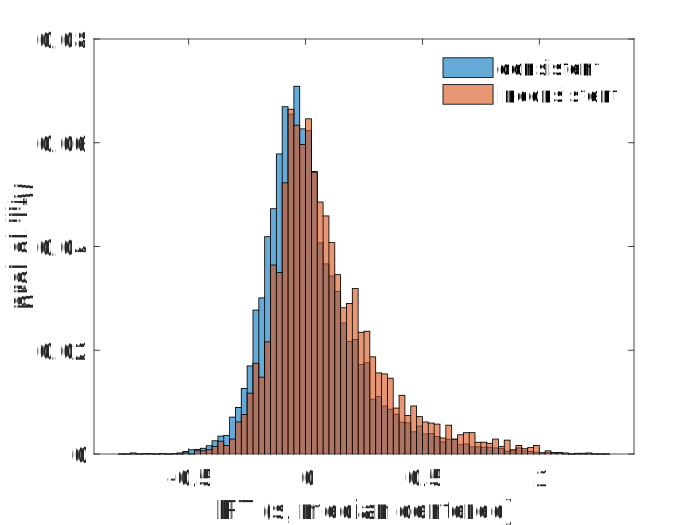

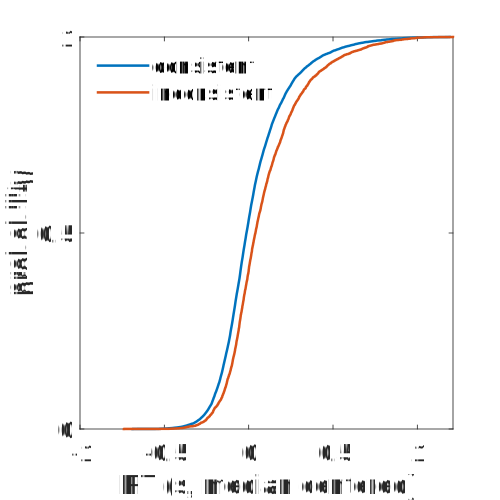

In [5]:
set(groot,'DefaultAxesFontSize',15)
set(groot,'DefaultLineLineWidth',1.5)
set(groot,'DefaultLegendBox','off')
for m=2
    model_data = read_data_csv(fullfile(GFIT_DATA_DIR,models_block.data{m}));
    model_data(isnan(model_data.choice01),:) = [];
    model_data.consistent = double(model_data.ptC=='HH'|model_data.ptC=='LL');
    model_data.RTn = nan(height(model_data),1);
    
    subj = unique(model_data.subject);
    for i=1:length(subj)
        model_data.RTn(strcmp(model_data.subject,subj{i})) = ...
            model_data.RT(strcmp(model_data.subject,subj{i})) - median(model_data.RT(strcmp(model_data.subject,subj{i})));
    end
    model_data.RTn = model_data.RTn./1000; %convert to seconds
    
    figure();
    %subplot(2,1,1);
    histogram(model_data.RTn(model_data.consistent==1),[-800:25:1300]./1000,'normalization','probability');
    %subplot(2,1,2);
    hold on;histogram(model_data.RTn(model_data.consistent==0),[-800:25:1300]./1000,'normalization','probability')
    legend({'consistent','inconsistent'})
    xlabel('RT (s, median centered)')
    ylabel('probability')
    
    figure('Position',[0 0 400 400]);
    cdfplot(model_data.RTn(model_data.consistent==1));
    hold on;cdfplot(model_data.RTn(model_data.consistent==0))
    legend({'consistent','inconsistent'},'Location','northwest')
    xlabel('RT (s, median centered)')
    ylabel('probability')
    %xticks([-750,0,750])
    yticks([0 .5 1])
    title('')
    grid off;
end
set(groot,'DefaultAxesFontSize','factory')
set(groot,'DefaultLineLineWidth','factory')
set(groot,'DefaultLegendBox','factory')

### Is adaptation justified vs. pop-out

Addresses R3 concern. 

Logic: An adaptation mechanism should affect both congruent (e.g. HHH, where the last tone is the test tone) and incongruent (e.g., LLH) sequences, by facilitating responding to incongruent sequences and impairing responding to congruent sequences. On the other hand, pop-out should predict a facilitory effect of incongruent sequences (i.e., the incongruent test tone "pops out," but no effect of congruent sequences, because unlike adaptation, responding is not depressed. 

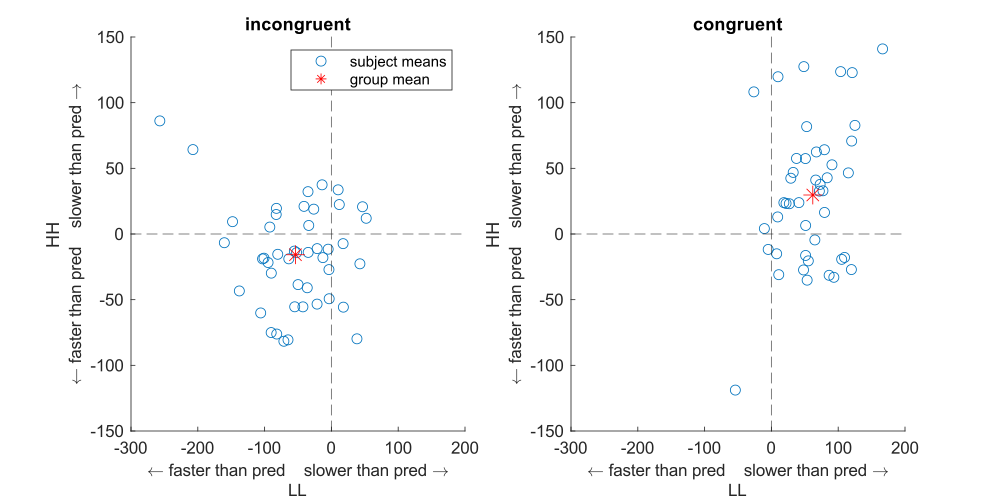

In [6]:
normalize=false;

biasOnly = readtable(fullfile(GFIT_DIR,models_pt.predicted{strcmp(models_pt.title,'bias only')}));
biasOnly.mean_RT_corr = biasOnly.mean_RT_corr.*1000;
model_data = read_data_csv(fullfile(GFIT_DATA_DIR,models_pt.data{strcmp(models_pt.title,'bias only')}));
model_data = innerjoin(model_data,biasOnly,'Keys',{'subject','SNR','bias'},'RightVariables',...
    {'mean_chooseH','mean_RT_corr'});

%restricting analysis to HH/LL max SNR correct trials
model_data = model_data(ismember(model_data.ptC,{'HH','LL'}) & abs(model_data.SNR)==0.5 & model_data.success==1,:);
model_data.ptC = removecats(model_data.ptC);

model_data.congruent = double((model_data.isH == 1 & model_data.ptC=='HH') | ...
    (model_data.isH==0 & model_data.ptC=='LL')); %STILL NEED THIS??? need to reverse code this for ordering in graph
    
con_conds=unique(model_data(:,{'ptC','isH','congruent'}));

this_subj = unique(model_data.subject);
if normalize
    for i=1:length(this_subj)
        model_data.RT(strcmp(model_data.subject,this_subj{i})) = ...
            zscore(model_data.RT(strcmp(model_data.subject,this_subj{i})));    
        model_data.mean_RT_corr(strcmp(model_data.subject,this_subj{i})) = ...
            zscore(model_data.mean_RT_corr(strcmp(model_data.subject,this_subj{i})));
    end
end

%model_data.choice_diff = model_data.choice01 - model_data.mean_chooseH;
model_data.RT_diff = model_data.RT - model_data.mean_RT_corr;

chrono_ave_b = summary_stats(model_data,{'RT_diff'},...
    {'subject','congruent','isH','ptC'},1); 

pop_title = {'incongruent','congruent'};
figure('Position',[0 0 800 400]);
for c=[0:1]
    %fprintf('%d\n',c)
    subplot(1,2,c+1);hold on;
    this_data = chrono_ave_b(chrono_ave_b.congruent==c,:);
    xline(0,'--');
    yline(0,'--');
    scatter(this_data.nanmean_RT_diff(this_data.ptC=='LL'),this_data.nanmean_RT_diff(this_data.ptC=='HH'))
    scatter(mean(this_data.nanmean_RT_diff(this_data.ptC=='LL')),mean(this_data.nanmean_RT_diff(this_data.ptC=='HH')),...
        100,'r*')
    xlabel({'\fontsize{10}\leftarrow faster than pred    slower than pred \rightarrow';'LL'})
    ylabel({'HH';'\fontsize{10}\leftarrow faster than pred    slower than pred \rightarrow'})
    title(pop_title{c+1})
    xlim([-300 200])
    ylim([-150 150])
    if c==0
        legend({'','','subject means','group mean'})
    end
end

# model comparison
### priorOnly


In [7]:
%FINAL

lle_pc = table();
for i=1:height(models_pc)
    this_lle = readtable(fullfile(GFIT_DIR,models_pc.lle{i}));
    lle_pc = [lle_pc; this_lle];
    clear this_lle
end

%wide format for subsequent comparisons
lle_pcW = unstack(lle_pc(:,{'subject','model','nlle','aic'}),{'nlle','aic'},{'model'});


lle_pc_ave =

  7x12 table

       model       nparams    GroupCount    mean_nlle    mean_aic    mean_bic    std_nlle    std_aic    std_bic    sem_nlle    sem_aic    sem_bic
    ___________    _______    __________    _________    ________    ________    ________    _______    _______    ________    _______    _______

    {'m0int'  }       6           49         -39.001     -66.001     -39.951      238.94     477.88      477.9      34.134     68.269     68.272 
    {'m0intlb'}       7           49          -81.91     -149.82     -119.43      243.72     487.45     487.47      34.818     69.635     69.639 
    {'m1lb'   }       9           49         -135.73     -253.46     -214.39      245.61     491.22     491.24      35.087     70.174     70.177 
    {'m2lb'   }       9           49         -139.81     -261.62     -222.54      249.65      499.3     499.32      35.664     71.329     71.332 
    {'m3'     }      10           49         -102.31     -184.63     -141.21      242.94     4

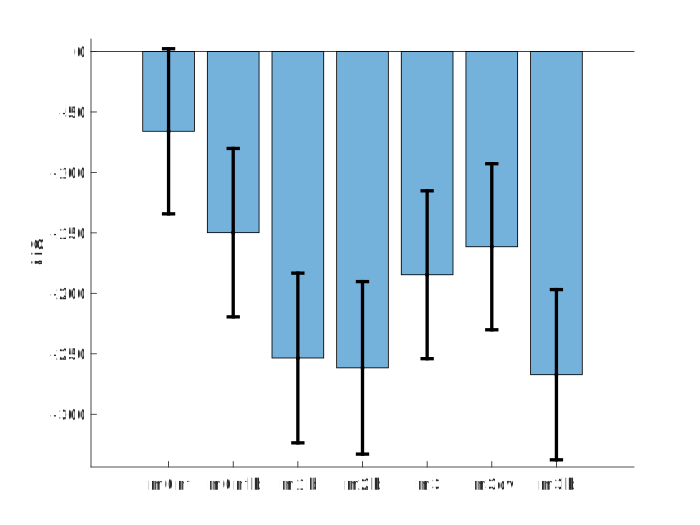

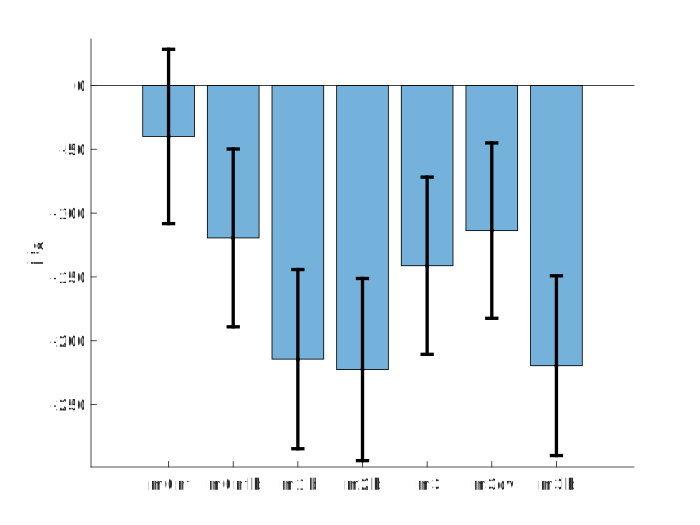

In [8]:
%FINAL

lle_pc_ave = summary_stats(lle_pc,{'nlle','aic','bic'},{'model','nparams'})

%plot AIC
barplot(lle_pc_ave.mean_aic,lle_pc_ave.sem_aic,'xticklabel',lle_pc_ave.model,'ylabel','AIC');
ylim([min(lle_pc_ave.mean_aic) - max(lle_pc_ave.sem_aic)-5,...
    max(lle_pc_ave.mean_aic) + max(lle_pc_ave.sem_aic)+5])
    
%{
barplot(lle_pc_ave.mean_aic,lle_pc_ave.sem_aic,'xticklabel',lle_pc_ave.model,'ylabel','AIC');
ylim([-275,-225])
%}
    
%delta_AIC = diff(lle_pc_ave.mean_aic)

%plot BIC
barplot(lle_pc_ave.mean_bic,lle_pc_ave.sem_bic,'xticklabel',lle_pc_ave.model,'ylabel','bic');
ylim([min(lle_pc_ave.mean_bic) - max(lle_pc_ave.sem_bic)-5,...
    max(lle_pc_ave.mean_bic) + max(lle_pc_ave.sem_bic)+5])

%{
barplot(lle_pc_ave.mean_bic,lle_pc_ave.sem_bic,'xticklabel',lle_pc_ave.model,'ylabel','bic');
ylim([-225,-210])
%}

%delta_bic = diff(lle_pc_ave.mean_bic)

#### drift variability vs. collapsing bound
No subjects were better fit by driftvar model, so dropping from subsequent tests


lb_betterthan_dv =

   52.9036


lb_betterthan_dv01 =

     1



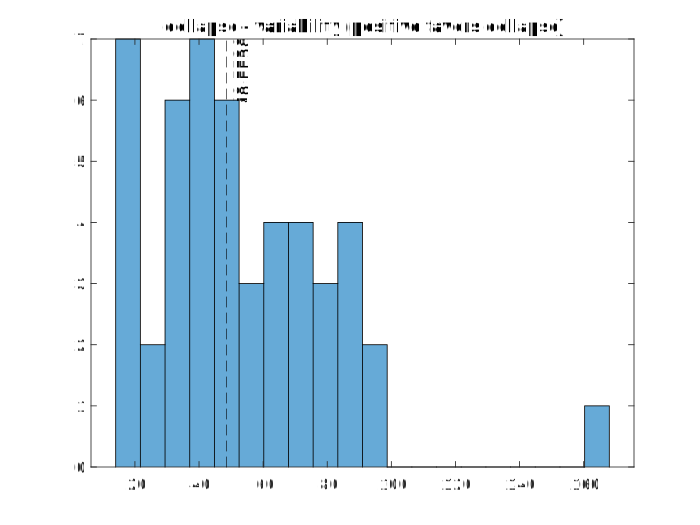

In [9]:
%and what about m3dv vs. m3lb? Is anyone fit better by m3dv?
lle_pcW.lbdv_diff = (-lle_pcW.nlle_m3lb) - (-lle_pcW.nlle_m3dv);
lle_pcW.lbdv_diff01 = double(lle_pcW.lbdv_diff > 0);

lb_betterthan_dv=mean(lle_pcW.lbdv_diff)
lb_betterthan_dv01 = mean(lle_pcW.lbdv_diff01)
figure();histogram(lle_pcW.lbdv_diff,20)
hold on;xline(median(lle_pcW.lbdv_diff),'--k','label',median(lle_pcW.lbdv_diff))
title('collapse - variability (positive favors collapse)')

#### Per-subject likelihood ratio tests comparing full model to reduced models
Also AIC/BIC mean differences

In [10]:
%now compute likelihood ratio test (and AIC/BIC diffs) per subject for targeted comparisons
LRT_comps = {
            'm3lb' 'm3';
            'm3lb' 'm1lb'
            'm3lb' 'm2lb'
            'm3lb' 'm0intlb'
            'm3lb' 'm0int'
            };

LRT_subj= table();
subj_pc = unique(lle_pc.subject);
for s=1:length(subj_pc)
    this_subj = subj_pc(s);
    this_lle = lle_pc(strcmp(lle_pc.subject,this_subj),:);
    for i=1:size(LRT_comps,1)
        umod = this_lle(strcmp(this_lle.model,LRT_comps{i,1}),:); %unrestricted model in matlab lratiotest parlance
        rmod = this_lle(strcmp(this_lle.model,LRT_comps{i,2}),:); %restricted model in matlab lratiotest parlance
        this_dof = umod.nparams-rmod.nparams;
        [h,p,stat,cValue] = lratiotest(-umod.nlle,-rmod.nlle,this_dof);
        this_lrt = table(h,p,stat,cValue);
        this_lrt.dof = this_dof;
        this_lrt.subject = this_subj;
        this_lrt.comparison = cellstr(sprintf('%s-%s',umod.model{1},rmod.model{1}));
        this_lrt.daic = -(umod.aic - rmod.aic); %by convention positive will be evidence for full model (to go along w/ LLR)
        this_lrt.dbic = -(umod.bic - rmod.bic);
        LRT_subj = [LRT_subj;this_lrt];
    end
    clear this_lrt this_lle umod rmod this_subj this_dof
end

LRT_subj.daic01 = double(LRT_subj.daic) > 0;
LRT_subj.dbic01 = double(LRT_subj.dbic) > 0;
LRT_subj.LLR = LRT_subj.stat./2;

> In lratiotest (line 195)
> In lratiotest (line 195)
> In lratiotest (line 195)
> In lratiotest (line 195)
> In lratiotest (line 195)
> In lratiotest (line 195)
> In lratiotest (line 195)
> In lratiotest (line 195)
> In lratiotest (line 195)
> In lratiotest (line 195)
> In lratiotest (line 195)
> In lratiotest (line 195)
> In lratiotest (line 195)
> In lratiotest (line 195)
> In lratiotest (line 195)
> In lratiotest (line 195)
> In lratiotest (line 195)
> In lratiotest (line 195)
> In lratiotest (line 195)


In [11]:
LRT_ave = varfun(@mean,LRT_subj,'InputVariables',{'h','LLR','daic','daic01','dbic','dbic01'},'GroupingVariables','comparison');
LRT_ave.model = cellfun(@(x) x{1},regexp(LRT_ave.comparison,'m\w*-(m\w*)','tokens','once'),'UniformOutput',false);

#### evidence bias vs. start bias vs. full model
Produces Fig 5c

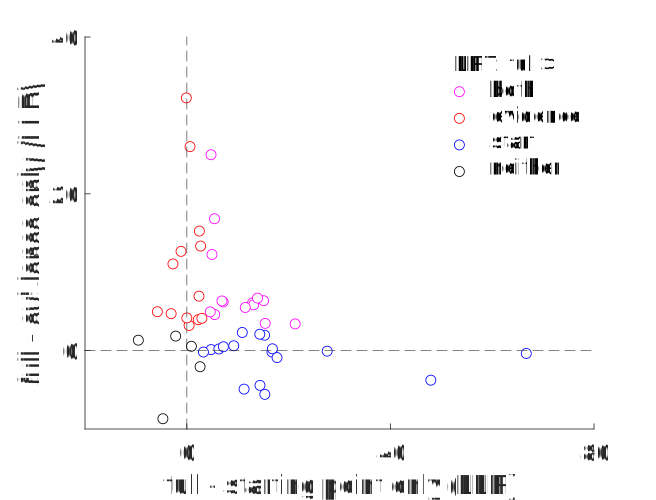

In [12]:
set(groot,'DefaultScatterMarkerFaceColor',[1 1 1])
set(groot,'DefaultAxesFontSize',15)

% fit comparisons
lle_pcW.nlle_m1m3 = lle_pcW.nlle_m1lb - lle_pcW.nlle_m3lb;
lle_pcW.nlle_m2m3 = lle_pcW.nlle_m2lb - lle_pcW.nlle_m3lb;
lle_pcW.m2m1_diff = lle_pcW.nlle_m2lb - lle_pcW.nlle_m1lb; %positive favors m1
lle_pcW.m2m1_diff01 = double(lle_pcW.m2m1_diff < 0);

%add in LRT data
LRT_m2m1 = unstack(LRT_subj(endsWith(LRT_subj.comparison,{'m1lb','m2lb'}),...
    {'subject','comparison','h'}),{'h'},{'comparison'},'NewDataVariableNames',{'m3m1_LRT','m3m2_LRT'});

try 
    lle_pcW.m3m1_LRT(1);
catch
    lle_pcW = join(lle_pcW,LRT_m2m1,'Keys','subject');
end

%set colors for plotting
%0: full better than neither; 1: full better than start; 2: full better than evidence; 3: full better than both
lle_pcW.LRT_code = (lle_pcW.m3m1_LRT | lle_pcW.m3m2_LRT) + lle_pcW.m3m2_LRT + (lle_pcW.m3m1_LRT & lle_pcW.m3m2_LRT);
lle_pcW.LRT_color = repmat([0 0 0],height(lle_pcW),1);
lle_pcW.LRT_color(lle_pcW.LRT_code==1,:) = repmat([0 0 1],sum(lle_pcW.LRT_code==1),1);
lle_pcW.LRT_color(lle_pcW.LRT_code==2,:) = repmat([1 0 0],sum(lle_pcW.LRT_code==2),1);
lle_pcW.LRT_color(lle_pcW.LRT_code==3,:) = repmat([1 0 1],sum(lle_pcW.LRT_code==3),1);

LRT_codes = flipud(unique(lle_pcW.LRT_code))';
LRT_legend = {'both','evidence','start', 'neither'};
% are relative fits of m1 and m2 negatively correlated (controlling for m3)
%figure();scatter(lle_pcW.nlle_m1m3,lle_pcW.nlle_m2m3,36,lle_pcW.LRT_color);
figure('Position',[0 0 525 400]);hold on;
for i=flipud(unique(lle_pcW.LRT_code))'
    this_ll = lle_pcW(lle_pcW.LRT_code==i,{'nlle_m1m3','nlle_m2m3','LRT_color'});
    scatter(this_ll.nlle_m1m3,this_ll.nlle_m2m3,36,this_ll.LRT_color);
end
xlabel('full - starting point only (LLR)')
ylabel('full - evidence only (LLR)')
hold on;xline(0,'--')
yline(0,'--')
xticks([0,40,80])
yticks([0 20 40])
legendflex(LRT_legend(4-LRT_codes),...
    'anchor',[3 3],'buffer',[-10,-10],'box','off',...
    'title',{'\fontsize{13}LRT: full >'});

set(groot,'DefaultScatterMarkerFaceColor','factory')
set(groot,'DefaultAxesFontSize','factory')

In [13]:
[pc_LRT_counts,LRT_cats]=histcounts(categorical(lle_pcW.LRT_code),'normalization','probability')


pc_LRT_counts =

    0.1020    0.3469    0.2653    0.2857


LRT_cats =

  1x4 cell array

    {'0'}    {'1'}    {'2'}    {'3'}



#### Bayesian model comparison
Importantly, this also favors the full model

---
Date: 29-Aug-2022 12:48:13
VB converged in 8 iterations (took ~5 sec).
Dimensions:
     - subjects: n=49
     - models: K=6
Posterior probabilities:
     - RFX: p(H1|y)= 1.000
     - null: p(H0|y)= 0.000

ans =

  6x2 table

       model          pep    
    ___________    __________

    {'m0int'  }    2.2127e-13
    {'m0intlb'}    2.2127e-13
    {'m1lb'   }       0.00754
    {'m2lb'   }       0.19765
    {'m3'     }    2.2127e-13
    {'m3lb'   }       0.79481



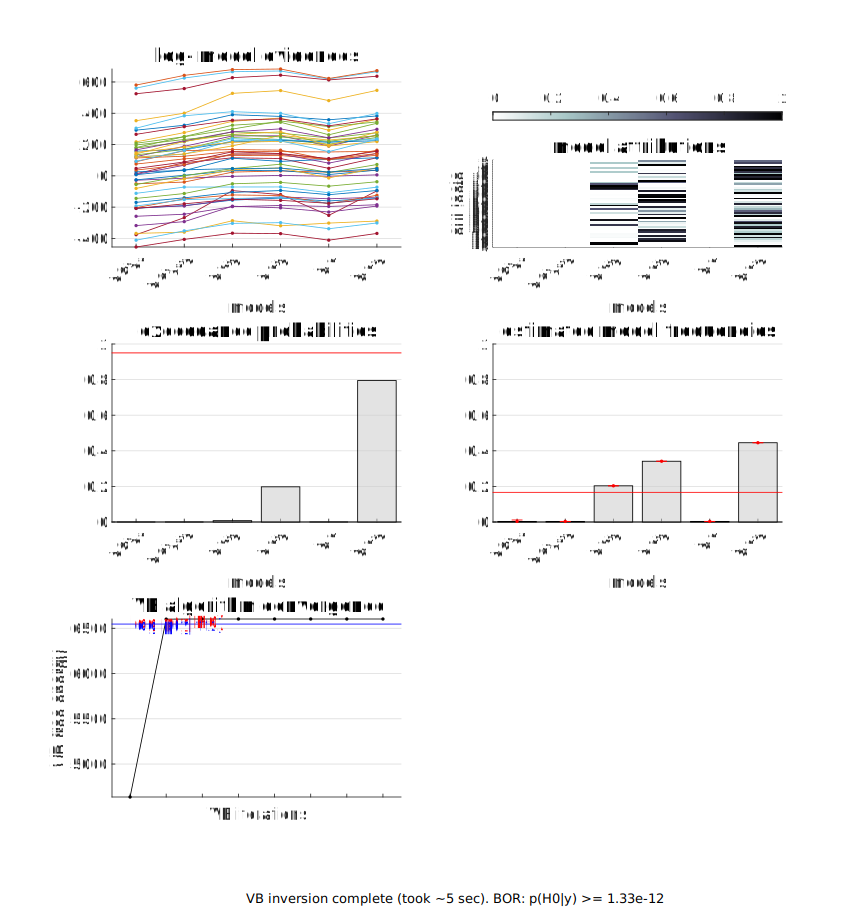

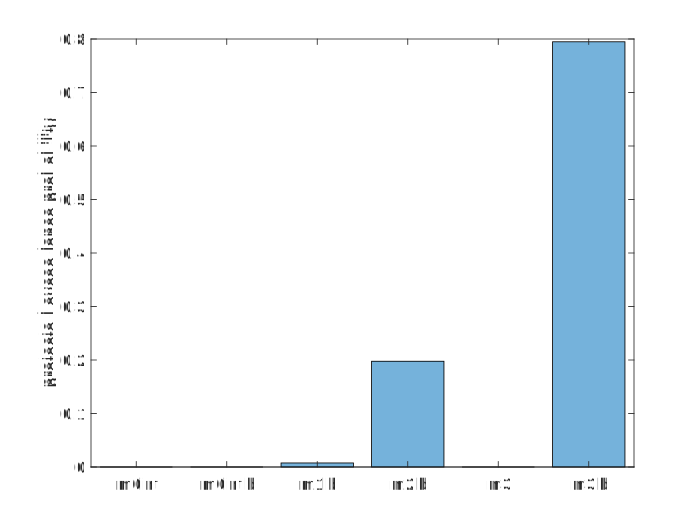

In [14]:
%FINAL

exclude_BMC = {'m3dv'}; %any models we don't want to include in the BMS? Just m3dv I think

[~,out] = do_BMC(lle_pc(~ismember(lle_pc.model,exclude_BMC),:));

out_table = table(out.options.modelNames',out.ep',out.PEP',out.Ef,...
    'VariableNames',{'model','ep','pep','Ef'});

%plot protected exceedance probabilities
figure();bar(categorical(out_table.model),out_table.pep)
%xticklabels(lle_pc.model)
ylabel('protected exceedance probability')
out_table(:,{'model','pep'})

In [15]:
%FINAL (for Table 3)

pc_comp_table = lle_pc_ave(:,{'model','nparams','mean_aic','mean_bic'});
pc_comp_table = innerjoin(pc_comp_table,out_table,'Keys','model','RightVariables','pep');
pc_comp_table = outerjoin(pc_comp_table,LRT_ave,'Keys','model','RightVariables',{'mean_h','mean_LLR','mean_daic01','mean_dbic01'})


pc_comp_table =

  6x9 table

       model       nparams    mean_aic    mean_bic       pep        mean_h     mean_LLR    mean_daic01    mean_dbic01
    ___________    _______    ________    ________    __________    _______    ________    ___________    ___________

    {'m0int'  }       6       -66.001     -39.951     2.2127e-13          1     105.64             1              1  
    {'m0intlb'}       7       -149.82     -119.43     2.2127e-13    0.97959     62.729       0.97959        0.93878  
    {'m1lb'   }       9       -253.46     -214.39        0.00754    0.63265     8.9071        0.7551        0.46939  
    {'m2lb'   }       9       -261.62     -222.54        0.19765    0.55102     4.8313       0.59184         0.2449  
    {'m3'     }      10       -184.63     -141.21     2.2127e-13          1     42.325             1              1  
    {'m3lb'   }      11       -267.28     -219.52        0.79481        NaN        NaN           NaN            NaN  



### pretoneOnly

In [16]:
%FINAL

lle_pt = table();
for i=1:height(models_pt)
    this_lle = readtable(fullfile(GFIT_DIR,models_pt.lle{i}));
    lle_pt = [lle_pt; this_lle];
    clear this_lle
end

%wide format for subsequent comparisons
lle_ptW = unstack(lle_pt(:,{'subject','model','nlle','aic'}),{'nlle','aic'},{'model'});


lle_pt_ave =

  6x12 table

       model       nparams    GroupCount    mean_nlle    mean_aic    mean_bic    std_nlle    std_aic    std_bic    sem_nlle    sem_aic    sem_bic
    ___________    _______    __________    _________    ________    ________    ________    _______    _______    ________    _______    _______

    {'m0int'  }       6           45         99.759       211.52       235.9      137.32     274.65     274.66      20.471     40.942     40.944 
    {'m0intlb'}       7           45         59.643       133.29      161.73      132.88     265.77     265.77      19.809     39.618     39.619 
    {'m13int' }      13           45         15.268       56.537      109.36      142.97     285.94     285.92      21.312     42.625     42.623 
    {'m14'    }      14           45         12.009       52.018       108.9      142.78     285.56     285.54      21.284     42.568     42.566 
    {'m17'    }      11           45         27.425       76.849      121.54      137.61     2

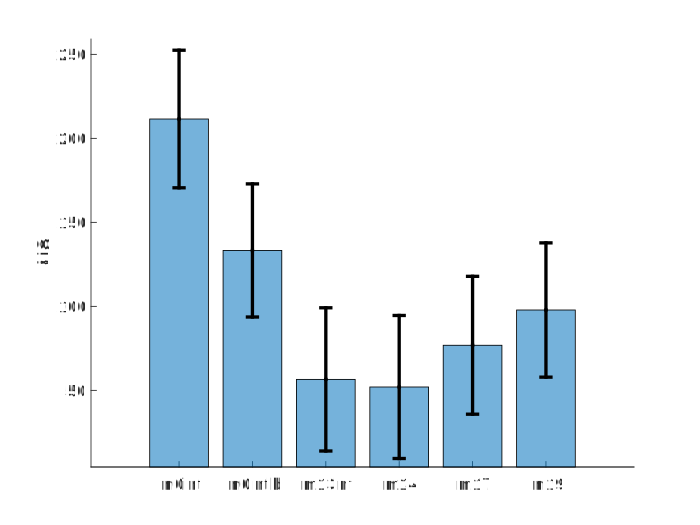

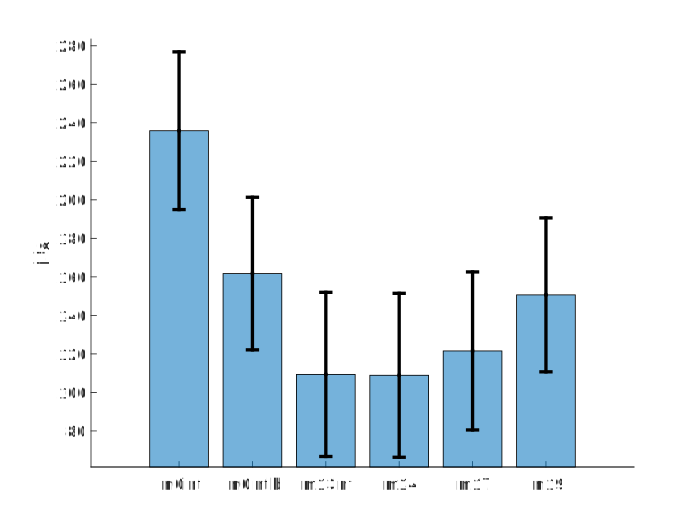

In [17]:
%FINAL

lle_pt_ave = summary_stats(lle_pt,{'nlle','aic','bic'},{'model','nparams'})

%plot AIC
barplot(lle_pt_ave.mean_aic,lle_pt_ave.sem_aic,'xticklabel',lle_pt_ave.model,'ylabel','AIC');
ylim([min(lle_pt_ave.mean_aic) - max(lle_pt_ave.sem_aic)-5,...
    max(lle_pt_ave.mean_aic) + max(lle_pt_ave.sem_aic)+5])
%delta_AIC = diff(lle_pt_ave.mean_aic)

%plot BIC
barplot(lle_pt_ave.mean_bic,lle_pt_ave.sem_bic,'xticklabel',lle_pt_ave.model,'ylabel','bic');
ylim([min(lle_pt_ave.mean_bic) - max(lle_pt_ave.sem_bic)-5,...
    max(lle_pt_ave.mean_bic) + max(lle_pt_ave.sem_bic)+5])
%delta_bic = diff(lle_pt_ave.mean_bic)

#### per-subject likelihood ratio tests comparing full vs. reduced models

In [18]:
%now compute likelihood ratio test per subject for targeted comparisons
LRT_pt_comps = {
            'm14' 'm17';
            'm14' 'm13int'
            'm14' 'm19'
            'm14' 'm0intlb'
            'm14' 'm0int'
            };

LRT_pt_subj= table();
subj_pt = unique(lle_pt.subject);
for s=1:length(subj_pt)
    this_subj = subj_pt(s);
    this_lle = lle_pt(strcmp(lle_pt.subject,this_subj),:);
    for i=1:size(LRT_pt_comps,1)
        umod = this_lle(strcmp(this_lle.model,LRT_pt_comps{i,1}),:); %unrestricted model in matlab lratiotest parlance
        rmod = this_lle(strcmp(this_lle.model,LRT_pt_comps{i,2}),:); %restricted model in matlab lratiotest parlance
        this_dof = umod.nparams-rmod.nparams;
        [h,p,stat,cValue] = lratiotest(-umod.nlle,-rmod.nlle,this_dof);
        this_lrt = table(h,p,stat,cValue);
        this_lrt.dof = this_dof;
        this_lrt.subject = this_subj;
        this_lrt.comparison = cellstr(sprintf('%s-%s',umod.model{1},rmod.model{1}));
        this_lrt.daic = -(umod.aic - rmod.aic); %by convention positive will be evidence for full model (to go along w/ LLR)
        this_lrt.dbic = -(umod.bic - rmod.bic);
        LRT_pt_subj = [LRT_pt_subj;this_lrt];
    end
    clear this_lrt this_lle umod rmod this_subj this_dof
end

LRT_pt_subj.daic01 = double(LRT_pt_subj.daic) > 0;
LRT_pt_subj.dbic01 = double(LRT_pt_subj.dbic) > 0;
LRT_pt_subj.LLR = LRT_pt_subj.stat./2;

> In lratiotest (line 195)
> In lratiotest (line 195)
> In lratiotest (line 195)
> In lratiotest (line 195)
> In lratiotest (line 195)
> In lratiotest (line 195)
> In lratiotest (line 195)
> In lratiotest (line 195)
> In lratiotest (line 195)
> In lratiotest (line 195)
> In lratiotest (line 195)
> In lratiotest (line 195)
> In lratiotest (line 195)
> In lratiotest (line 195)
> In lratiotest (line 195)
> In lratiotest (line 195)
> In lratiotest (line 195)
> In lratiotest (line 195)
> In lratiotest (line 195)


In [19]:
LRT_pt_ave = varfun(@mean,LRT_pt_subj,'InputVariables',{'h','LLR','daic','daic01','dbic','dbic01'},...
    'GroupingVariables','comparison')
LRT_pt_ave.model = cellfun(@(x) x{1},regexp(LRT_pt_ave.comparison,'m\w*-(m\w*)','tokens','once'),'UniformOutput',false);


LRT_pt_ave =

  5x8 table

      comparison       GroupCount    mean_h     mean_LLR    mean_daic    mean_daic01    mean_dbic    mean_dbic01
    _______________    __________    _______    ________    _________    ___________    _________    ___________

    {'m14-m0int'  }        45        0.95556      87.75       159.5        0.95556        126.99       0.95556  
    {'m14-m0intlb'}        45        0.91111     47.634      81.269        0.91111        52.827       0.73333  
    {'m14-m13int' }        45        0.46667     3.2594      4.5187        0.62222       0.45554       0.37778  
    {'m14-m17'    }        45        0.77778     15.416      24.831        0.86667        12.642       0.57778  
    {'m14-m19'    }        45        0.88889     23.909      45.817        0.91111        41.754       0.84444  



#### full vs. evidence only vs. start only models
Figure 5d

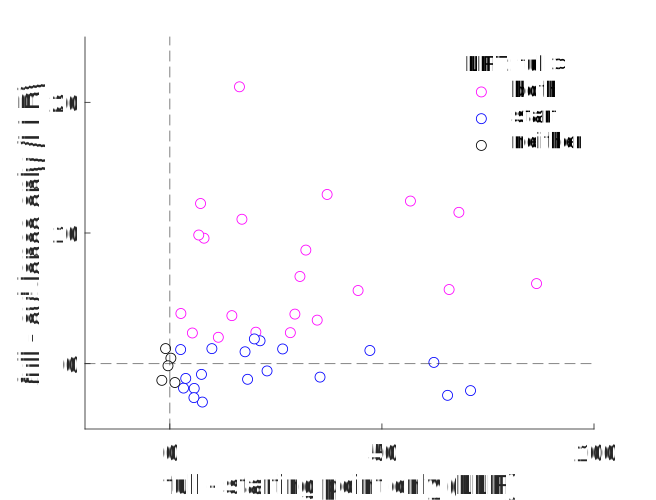

In [20]:
%FINAL

set(groot,'DefaultScatterMarkerFaceColor',[1 1 1])
set(groot,'DefaultAxesFontSize',15)

% fit comparisons
lle_ptW.nlle_m19m14 = lle_ptW.nlle_m19 - lle_ptW.nlle_m14; %start
lle_ptW.nlle_m13m14 = lle_ptW.nlle_m13int - lle_ptW.nlle_m14; %evidence
lle_ptW.m13m19_diff = lle_ptW.nlle_m13int - lle_ptW.nlle_m19; %positive favors m19
lle_ptW.m13m19_diff01 = double(lle_ptW.m13m19_diff< 0);

%add in LRT data
LRT_m13m19 = unstack(LRT_pt_subj(endsWith(LRT_pt_subj.comparison,{'m13int','m19'}),...
    {'subject','comparison','h'}),{'h'},{'comparison'},'NewDataVariableNames',{'m14m13_LRT','m14m19_LRT'});

try 
    lle_ptW.m14m19_LRT(1);
catch
    lle_ptW = join(lle_ptW,LRT_m13m19,'Keys','subject');
end

%set colors for plotting
lle_ptW.LRT_code = (lle_ptW.m14m19_LRT | lle_ptW.m14m13_LRT) + lle_ptW.m14m13_LRT + (lle_ptW.m14m19_LRT & lle_ptW.m14m13_LRT);
lle_ptW.LRT_color = repmat([0 0 0],height(lle_ptW),1);
lle_ptW.LRT_color(lle_ptW.LRT_code==1,:) = repmat([0 0 1],sum(lle_ptW.LRT_code==1),1);
lle_ptW.LRT_color(lle_ptW.LRT_code==2,:) = repmat([1 0 0],sum(lle_ptW.LRT_code==2),1);
lle_ptW.LRT_color(lle_ptW.LRT_code==3,:) = repmat([1 0 1],sum(lle_ptW.LRT_code==3),1);

pt_LRT_codes = flipud(unique(lle_ptW.LRT_code))';
LRT_legend = {'both','evidence','start', 'neither'};
%figure();scatter(lle_ptW.nlle_m19m14,lle_ptW.nlle_m13m14,36,lle_ptW.LRT_color);
figure('Position',[0 0 525 400]);hold on;
for i=pt_LRT_codes
    this_ll = lle_ptW(lle_ptW.LRT_code==i,{'nlle_m19m14','nlle_m13m14','LRT_color'});
    scatter(this_ll.nlle_m19m14,this_ll.nlle_m13m14,36,this_ll.LRT_color);
end
xlabel('full - starting point only (LLR)')
ylabel('full - evidence only (LLR)')
hold on;xline(0,'--')
yline(0,'--')
xticks([0,50,100])
yticks([0,10,20])
legendflex(LRT_legend(4-pt_LRT_codes),...
    'anchor',[3 3],'buffer',[-10,-10],'box','off',...
    'title',{'\fontsize{13}LRT: full >'});

set(groot,'DefaultScatterMarkerFaceColor','factory')
set(groot,'DefaultAxesFontSize','factory')

In [21]:
[pt_LRT_counts,LRT_cats]=histcounts(categorical(lle_ptW.LRT_code),'normalization','probability')


pt_LRT_counts =

    0.1111    0.4222    0.4667


LRT_cats =

  1x3 cell array

    {'0'}    {'1'}    {'3'}



#### Bayesian model comparison
Strongly favors full.

---
Date: 29-Aug-2022 12:48:28
VB converged in 17 iterations (took ~7 sec).
Dimensions:
     - subjects: n=45
     - models: K=6
Posterior probabilities:
     - RFX: p(H1|y)= 1.000
     - null: p(H0|y)= 0.000

ans =

  6x2 table

       model          pep    
    ___________    __________

    {'m0int'  }    2.8194e-12
    {'m0intlb'}    2.8194e-12
    {'m13int' }       0.00655
    {'m14'    }       0.99345
    {'m17'    }    2.8194e-12
    {'m19'    }    2.8194e-12



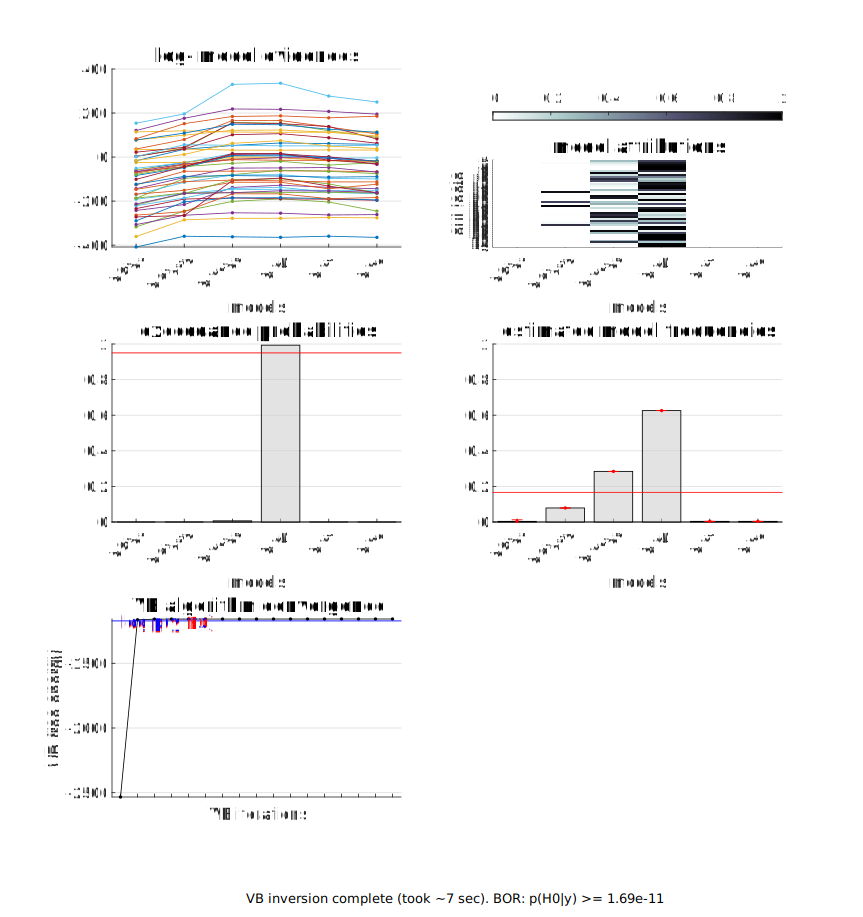

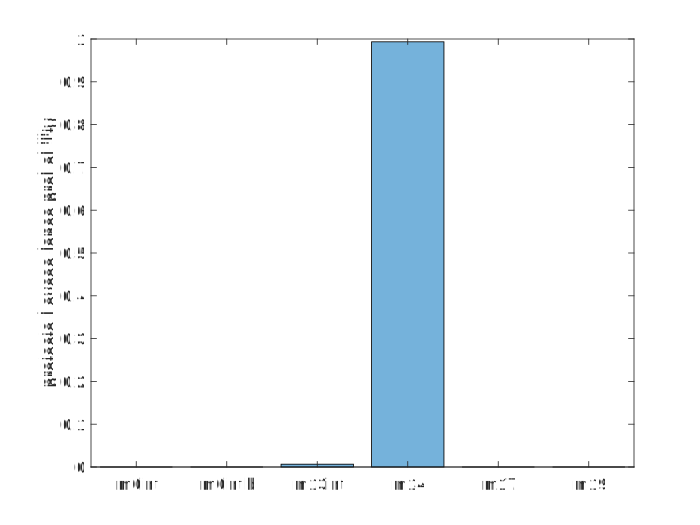

In [22]:
%FINAL

[~,out] = do_BMC(lle_pt);

    
out_table_pt = table(out.options.modelNames',out.ep',out.PEP',out.Ef,...
    'VariableNames',{'model','ep','pep','Ef'});

%plot protected exceedance probabilities
figure();bar(categorical(out_table_pt.model),out_table_pt.pep)
ylabel('protected exceedance probability')

out_table_pt(:,{'model','pep'})

In [23]:
%FINAL (for Table 3)

pt_comp_table = lle_pt_ave(:,{'model','nparams','mean_aic','mean_bic'});
pt_comp_table = innerjoin(pt_comp_table,out_table_pt,'Keys','model','RightVariables','pep');
pt_comp_table = outerjoin(pt_comp_table,LRT_pt_ave,'Keys','model','RightVariables',...
    {'mean_h','mean_LLR','mean_daic01','mean_dbic01'})


pt_comp_table =

  6x9 table

       model       nparams    mean_aic    mean_bic       pep        mean_h     mean_LLR    mean_daic01    mean_dbic01
    ___________    _______    ________    ________    __________    _______    ________    ___________    ___________

    {'m0int'  }       6        211.52       235.9     2.8194e-12    0.95556      87.75       0.95556        0.95556  
    {'m0intlb'}       7        133.29      161.73     2.8194e-12    0.91111     47.634       0.91111        0.73333  
    {'m13int' }      13        56.537      109.36        0.00655    0.46667     3.2594       0.62222        0.37778  
    {'m14'    }      14        52.018       108.9        0.99345        NaN        NaN           NaN            NaN  
    {'m17'    }      11        76.849      121.54     2.8194e-12    0.77778     15.416       0.86667        0.57778  
    {'m19'    }      13        97.835      150.66     2.8194e-12    0.88889     23.909       0.91111        0.84444  



## Plot reduced model fits

> In read_data_csv (line 16)
> In read_data_csv (line 17)
> In read_data_csv (line 16)
> In read_data_csv (line 17)
> In read_data_csv (line 16)
> In read_data_csv (line 17)
> In read_data_csv (line 16)
> In read_data_csv (line 17)
> In read_data_csv (line 16)
> In read_data_csv (line 17)
> In read_data_csv (line 16)
> In read_data_csv (line 17)


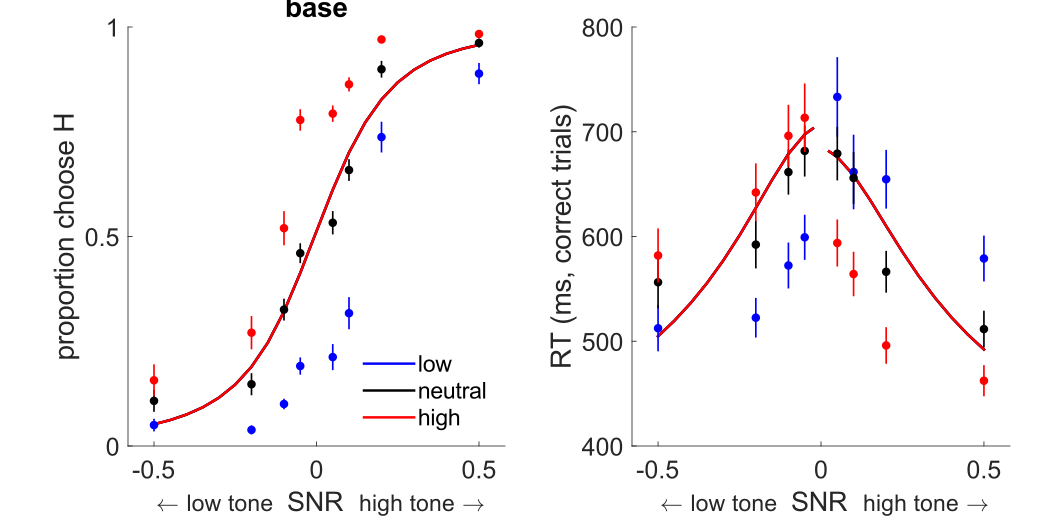

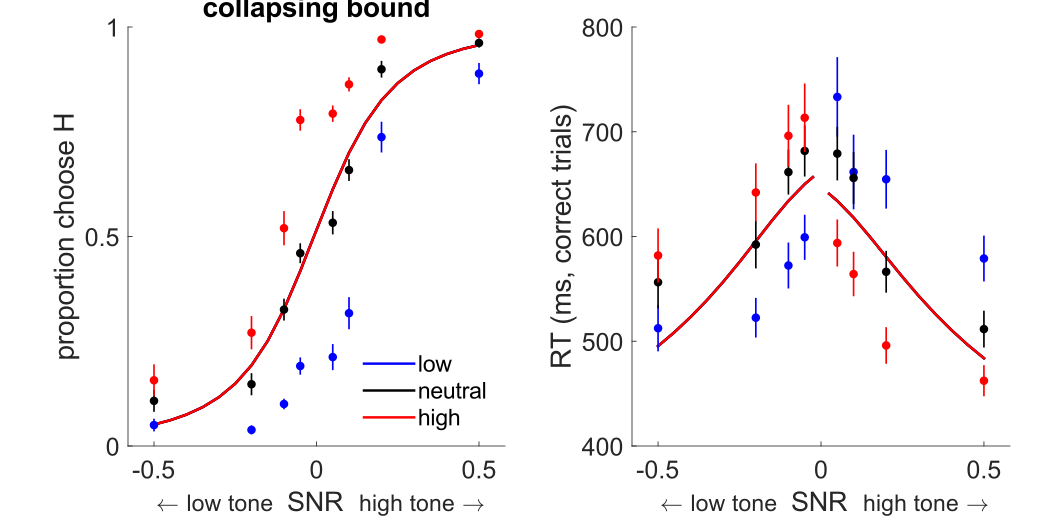

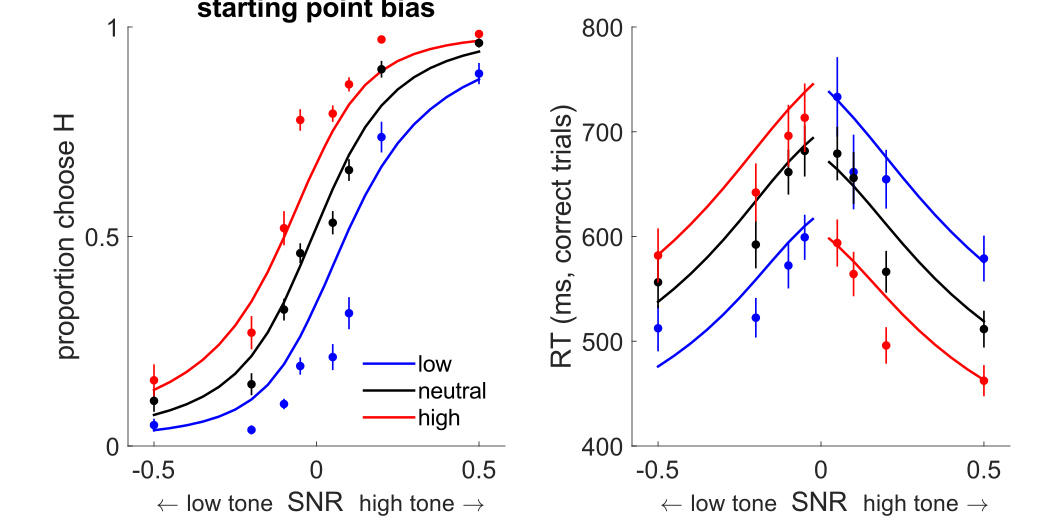

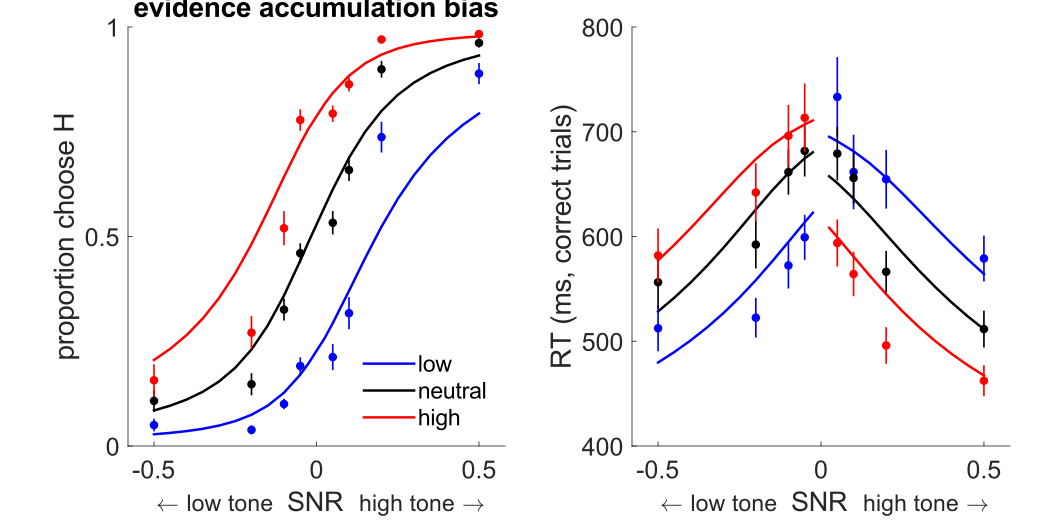

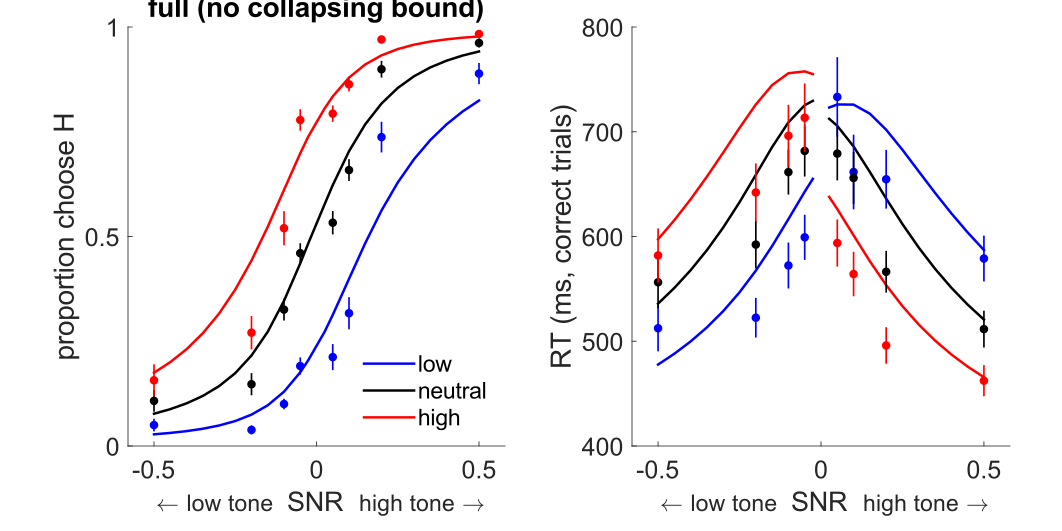

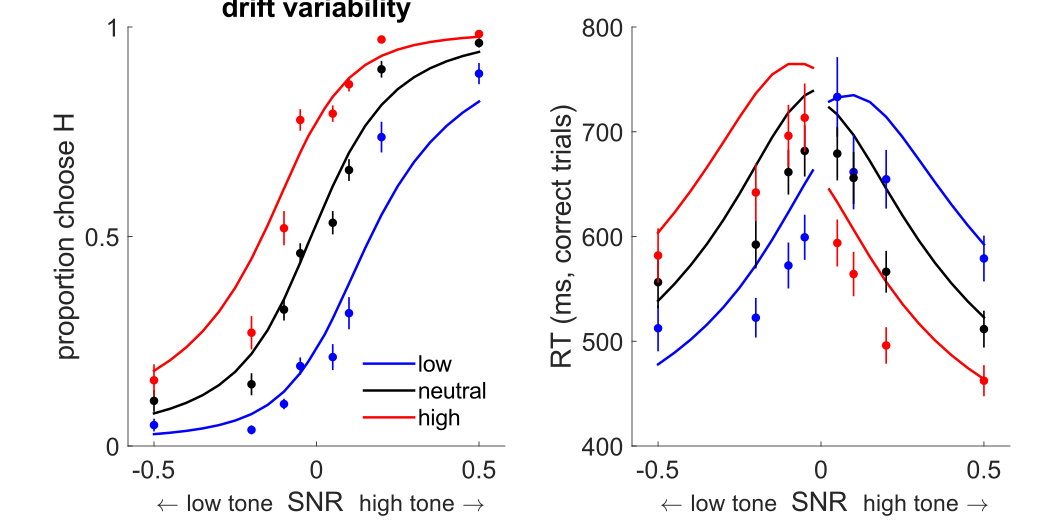

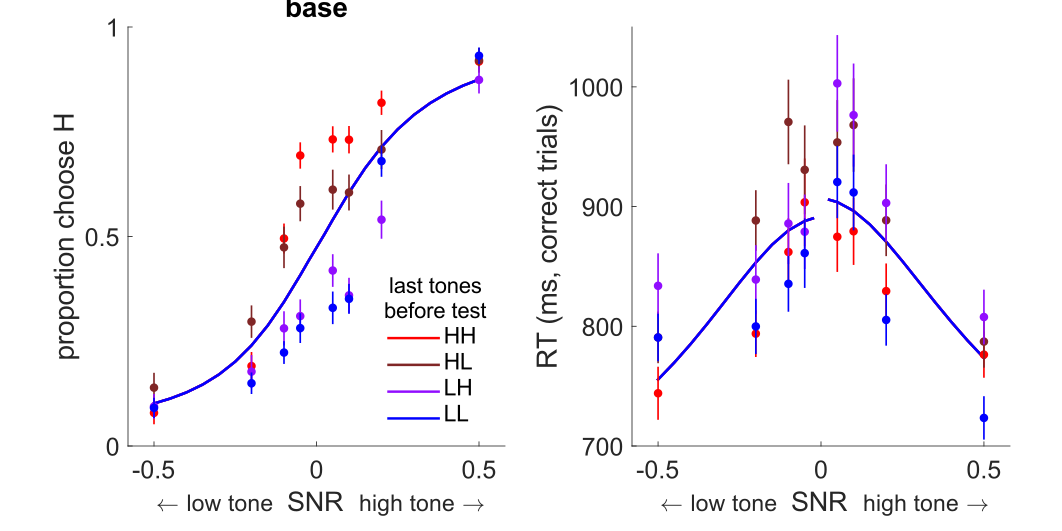

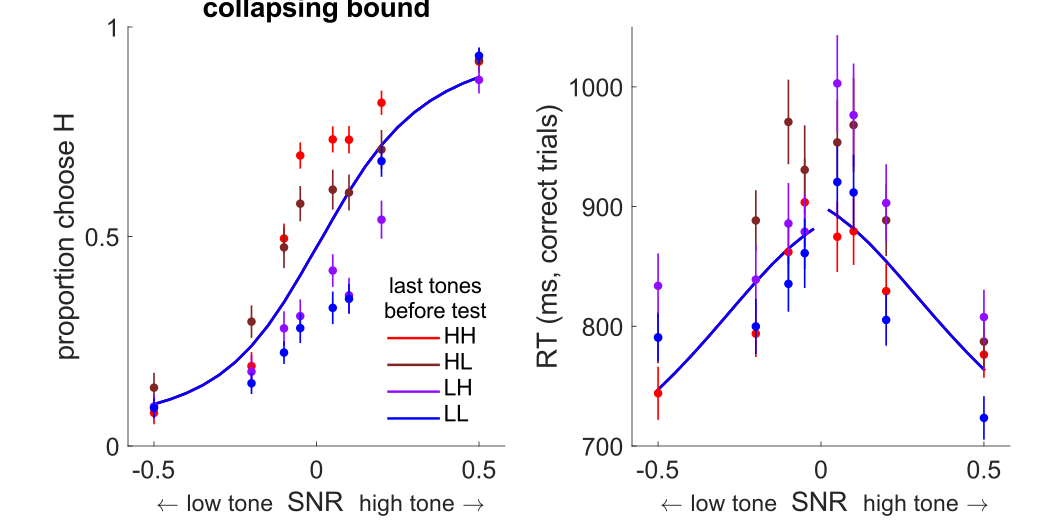

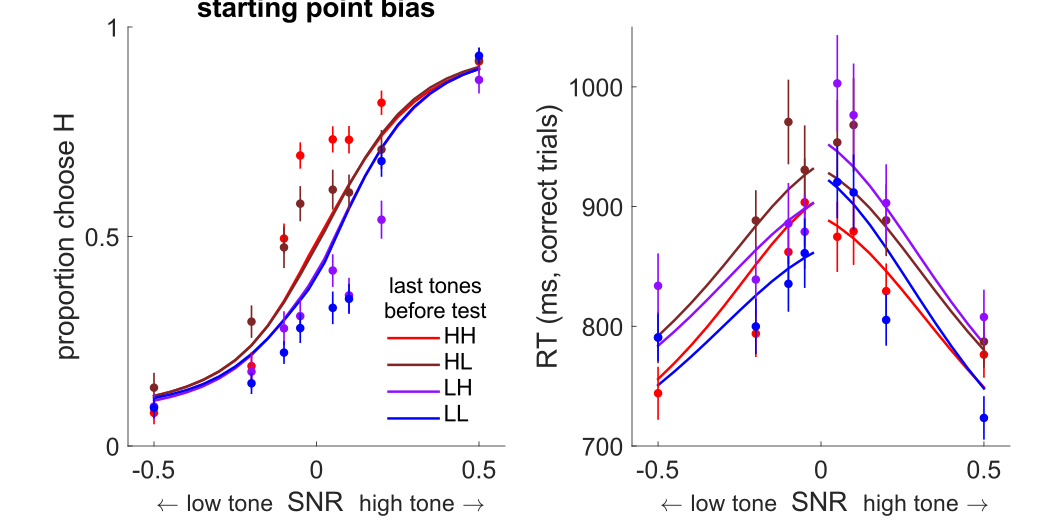

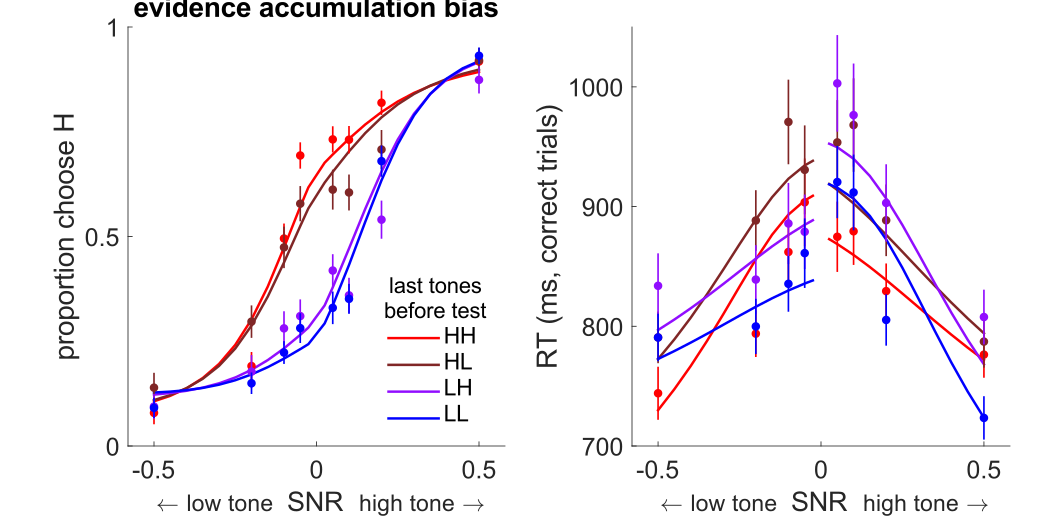

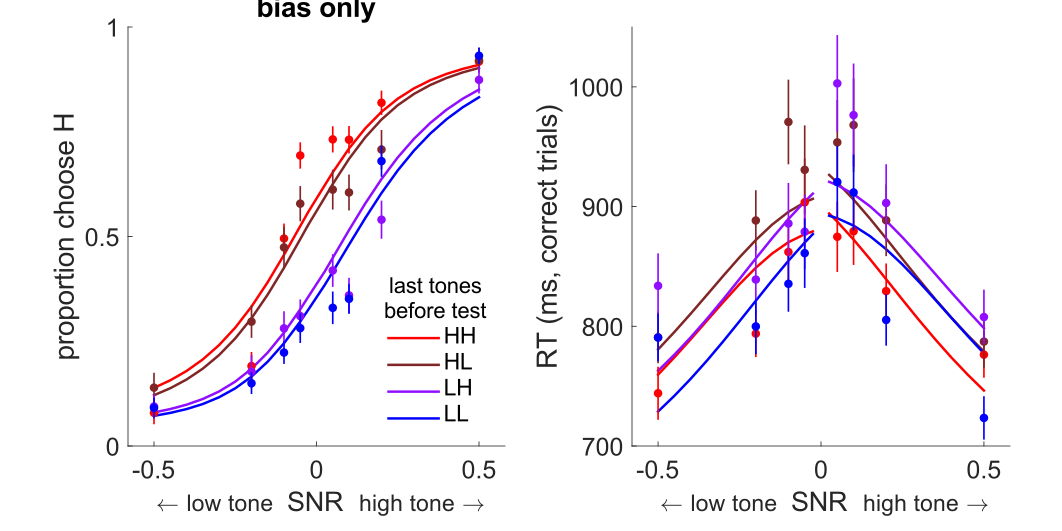

In [24]:
%FINAL
models_reduc = [models_pc;models_pt];
models_reduc(strcmp(models_reduc.title,'full'),:) = [];

this_figdim = [1 1 850 425];
this_subplot = @(m,n,p) subtightplot(m,n,p,.12,[.16 .05],[0.12 0.05]);
set(groot,'DefaultAxesFontSize',15)
set(groot,'DefaultLineLineWidth',1.5)
set(groot,'DefaultErrorBarLineWidth',1)
set(groot,'DefaultErrorBarMarkerSize',14)
set(groot,'DefaultErrorBarCapSize',0)
set(groot,'DefaultLegendBox','off')

psycho_xlab = ' \fontsize{14}\leftarrow low tone  \fontsize{16}SNR  \fontsize{14}high tone \rightarrow';
for m=1:height(models_reduc)
    this_data = read_data_csv(fullfile(GFIT_DATA_DIR,models_reduc.data{m}));
    this_data(isnan(this_data.choice01),:) = []; %remove missing trials
    
    SNR = unique(this_data.SNR);
    
    subj_predicted = readtable(fullfile(GFIT_DIR,models_reduc.predicted_smooth{m}));
    subj_predicted.mean_RT_corr = subj_predicted.mean_RT_corr.*1000;
    subj_predicted.success = ones(height(subj_predicted),1); %not sure this is necessary but going w/ it to change as little as possible

    
    if models_reduc.pretone(m)==1
        %attach ptC column to predictions
        %we include isH b/c don't have predictions for high/low tone for all combos of bias/subject given lack of these in 
        %the true data (this only matters for no bias cases, so that outer join doesn't create condiitons not in the
        %rest of the data)
        ptC_vals = unique(this_data(:,{'subject','bias','ptC','isH'}),'rows');
        if ismember('bias',subj_predicted.Properties.VariableNames)
            subj_predicted = join(subj_predicted,ptC_vals,'Keys',{'subject','bias','isH'},'RightVariables',...
                {'ptC'});
        else
            %duplicate predictions for each ptC if model doesn't include bias
            subj_predicted = outerjoin(subj_predicted,ptC_vals,'Keys',{'subject','isH'},'MergeKeys',true);
        end
        
        %get actual proprotions of each pretone seq per subject
        subj = unique(this_data.subject);
        ptG = [];
        for s=1:length(subj)
            this_ptG = groupcounts(this_data(strcmp(this_data.subject,subj{s}),{'bias','isH'}),...
                {'bias','isH'}); 
            this_ptG.subject = repmat(subj(s),height(this_ptG),1);
            ptG = [ptG;this_ptG];
        end
        ptG.Percent = ptG.Percent./100;
        subj_predicted = join(subj_predicted,ptG,'Keys',{'subject','bias','isH'},...
            'RightVariables','Percent');
            
        %average data effects
        psycho_ave_ptm = varfun(@nanmean,this_data,'InputVariables',{'choice01'},...
            'GroupingVariables',{'subject','ptC','SNR'});
        psycho_ave_ptm_all = summary_stats(psycho_ave_ptm,{'nanmean_choice01'},...
            {'ptC','SNR'});
        chrono_ave_ptm = varfun(@nanmean,this_data,'InputVariables',{'RT'},...
            'GroupingVariables',{'subject','ptC','success','SNR'});
        chrono_ave_ptm_all = summary_stats(chrono_ave_ptm,{'nanmean_RT'},...
            {'ptC','success','SNR'},1);  
        
        %average predicted effects
        %psycho_ave_ptmp = varfun(@nanmean,subj_predicted,'InputVariables',{'mean_chooseH'},...
        %    'GroupingVariables',{'subject','ptC','SNR'});
        %this version calculates weighted average according to actual proportions of 
        %trials for each pretone sequence. This gives the same result as
        %straight average for ptlen <= 2.
        psycho_ave_ptmp = rowfun(@(x,w) sum(x.*w)./sum(w),subj_predicted,...
            'InputVariables',{'mean_chooseH','Percent'},...
            'GroupingVariables',{'subject','ptC','SNR'},...
            'OutputVariableName','nanmean_mean_chooseH');
        psycho_ave_ptmp_all = summary_stats(psycho_ave_ptmp,{'nanmean_mean_chooseH'},...
            {'ptC','SNR'});
        %chrono_ave_ptmp = varfun(@nanmean,subj_predicted,'InputVariables',{'mean_RT_corr'},...
        %    'GroupingVariables',{'subject','ptC','success','SNR'});
        chrono_ave_ptmp = rowfun(@(x,w) sum(x.*w)./sum(w),subj_predicted,...
            'InputVariables',{'mean_RT_corr','Percent'},...
            'GroupingVariables',{'subject','ptC','success','SNR'},...
            'OutputVariableName','nanmean_mean_RT_corr');
        chrono_ave_ptmp_all = summary_stats(chrono_ave_ptmp,{'nanmean_mean_RT_corr'},...
            {'ptC','success','SNR'},1);  
            

        figure('Position',this_figdim);hold on;
        this_subplot(1,2,1)
        h_psychm = psycho_plot(psycho_ave_ptmp_all,...
            'ptC',mline_style,'mean_nanmean_mean_chooseH',[]);
        [h_psychm.Color] = jet4r{:}; 
        h_psych = psycho_plot(psycho_ave_ptm_all,'ptC','.');
        [h_psych.Color] = jet4r{:}; 
        xlabel(psycho_xlab)
        ylabel('proportion choose H')
        ylim([0 1])
        xlim([-.58 .58])
        yticks([0 .5 1])
        title(models_reduc.title{m},'Interpreter','none')
        %legend(psychpt_leg,'Location','SouthEast')
        psychpt_leg = cellstr(unique(this_data.ptC(~isundefined(this_data.ptC))));
        legendflex(psychpt_leg,'anchor',[5 5],'buffer',[-12,10],'box','off',...
            'title',{'\fontsize{13}last tones';'\fontsize{13}before test'});

        this_subplot(1,2,2)
        hold on;
        h_chronom = chrono_plot(chrono_ave_ptmp_all,'ptC',mline_style,'nanmean_nanmean_mean_RT_corr',[],1);
        chrono_color(h_chronom,jet4r)
        h_chrono = chrono_plot(chrono_ave_ptm_all,'ptC','.','nanmean_nanmean_RT','nansem_nanmean_RT',1);
        chrono_color(h_chrono,jet4r) 
        xlabel(psycho_xlab)
        xlim([-.58 .58])
        ylabel('RT (ms, correct trials)')
        title('');
        this_ytx = yticks(gca);
        %yticks(round(linspace(this_ytx(1),this_ytx(end),4)))
        yticks(this_ytx(1):100:this_ytx(end))
    end
    
    if models_reduc.prior(m)==1
        %duplicate predictions for each prior if model doesn't include prior
        if ~ismember('prior',subj_predicted.Properties.VariableNames)
            subj_predicted = ...
                outerjoin(subj_predicted,unique(this_data(:,{'subject','prior'}),'rows'),...
                'Keys','subject','MergeKeys',true);
        end
            
        %average data effects
        psycho_ave_priorm= varfun(@nanmean,this_data,'InputVariables',{'choice01'},...
            'GroupingVariables',{'subject','prior','SNR'});
        psycho_ave_priorm_all = summary_stats(psycho_ave_priorm,{'nanmean_choice01'},...
            {'prior','SNR'});
        chrono_ave_priorm = varfun(@nanmean,this_data,'InputVariables',{'RT'},...
            'GroupingVariables',{'subject','prior','success','SNR'});
        chrono_ave_priorm_all = summary_stats(chrono_ave_priorm,{'nanmean_RT'},...
            {'prior','success','SNR'},1);  
            
        %average predicted effects
        psycho_ave_priormp= varfun(@nanmean,subj_predicted,'InputVariables',{'mean_chooseH'},...
            'GroupingVariables',{'subject','prior','SNR'});
        psycho_ave_priormp_all = summary_stats(psycho_ave_priormp,{'nanmean_mean_chooseH'},...
            {'prior','SNR'});
        chrono_ave_priormp = varfun(@nanmean,subj_predicted,'InputVariables',{'mean_RT_corr'},...
            'GroupingVariables',{'subject','prior','success','SNR'});
        chrono_ave_priormp_all = summary_stats(chrono_ave_priormp,{'nanmean_mean_RT_corr'},...
            {'prior','success','SNR'},1);  
        
        this_psych_color = psych_color(ismember([-2 0 2],psycho_ave_priorm_all.prior));
        this_psych_leg = psych_leg(ismember([-2 0 2],psycho_ave_priorm_all.prior));

        figure('Position',this_figdim);hold on;
        this_subplot(1,2,1)
        h_psychm = psycho_plot(psycho_ave_priormp_all,...
            'prior',strcat(mline_style,this_psych_color),'mean_nanmean_mean_chooseH',[]);
        h_psych = psycho_plot(psycho_ave_priorm_all,'prior',strcat('.',this_psych_color));
        xlabel(psycho_xlab)
        ylabel('proportion choose H')
        ylim([0 1])
        xlim([-.58 .58])
        yticks([0 .5 1])
        title(models_reduc.title{m},'Interpreter','none')
        legend(this_psych_leg,'Location','SouthEast')

        this_subplot(1,2,2)
        hold on;
        h_chronom = chrono_plot(chrono_ave_priormp_all,'prior',strcat(mline_style,this_psych_color),...
            'nanmean_nanmean_mean_RT_corr',[],1);
        h_chrono = chrono_plot(chrono_ave_priorm_all,'prior',strcat('.',this_psych_color),...
            'nanmean_nanmean_RT','nansem_nanmean_RT',1);
        xlabel(psycho_xlab)
        xlim([-.58 .58])
        ylabel('RT (ms, correct trials)')
        title('')
        this_ytx = yticks(gca);
        %yticks(round(linspace(this_ytx(1),this_ytx(end),4)))
        yticks(this_ytx(1):100:this_ytx(end))
    end
   
end

set(groot,'DefaultAxesFontSize','factory')
set(groot,'DefaultLineLineWidth','factory')
set(groot,'DefaultErrorBarLineWidth','factory')
set(groot,'DefaultErrorBarMarkerSize','factory')
set(groot,'DefaultErrorBarCapSize','factory')
set(groot,'DefaultLegendBox','factory')

### Plot reduced model fits w/ full fits overlaid
Figure 5a,b

> In read_data_csv (line 16)
> In read_data_csv (line 17)
> In read_data_csv (line 16)
> In read_data_csv (line 17)
> In read_data_csv (line 16)
> In read_data_csv (line 17)
> In read_data_csv (line 16)
> In read_data_csv (line 17)
> In read_data_csv (line 16)
> In read_data_csv (line 17)
> In read_data_csv (line 16)
> In read_data_csv (line 17)


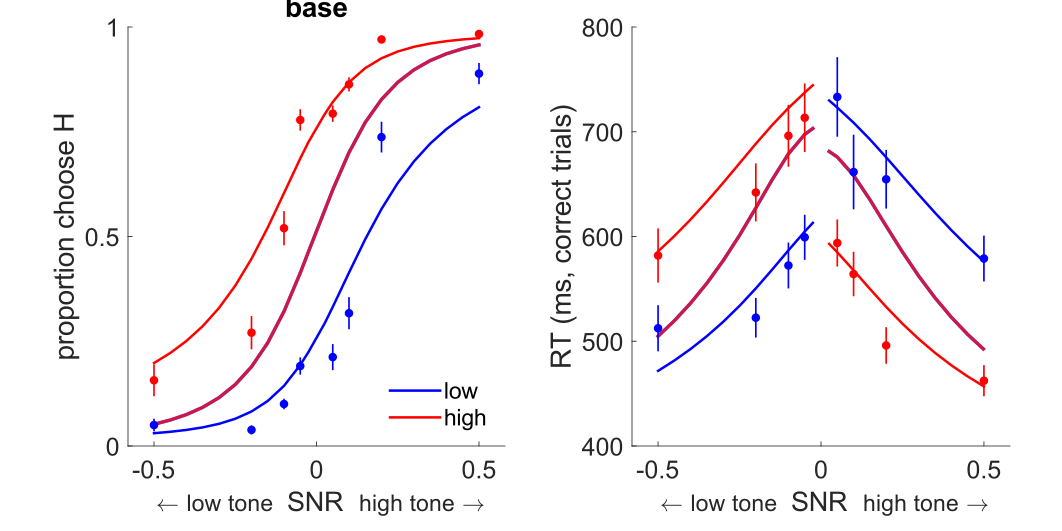

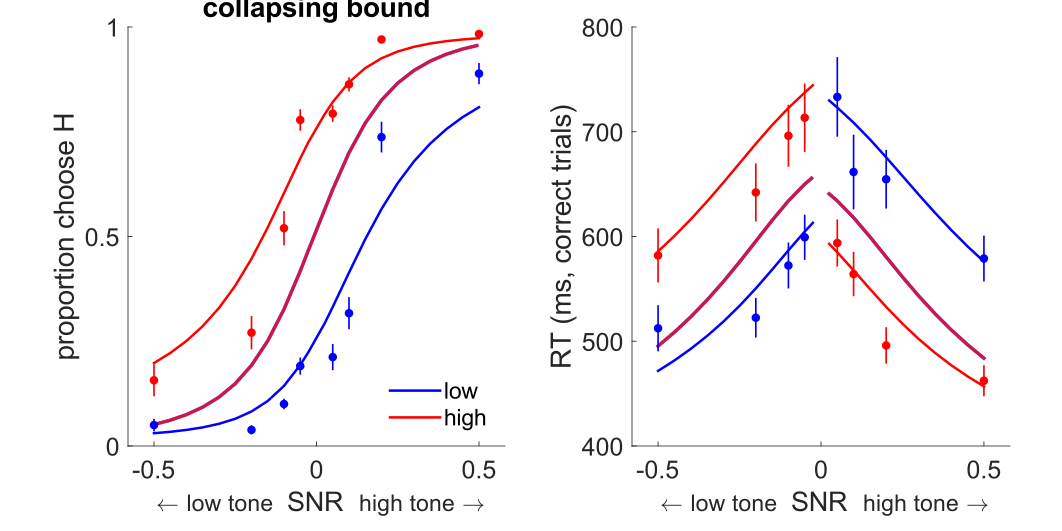

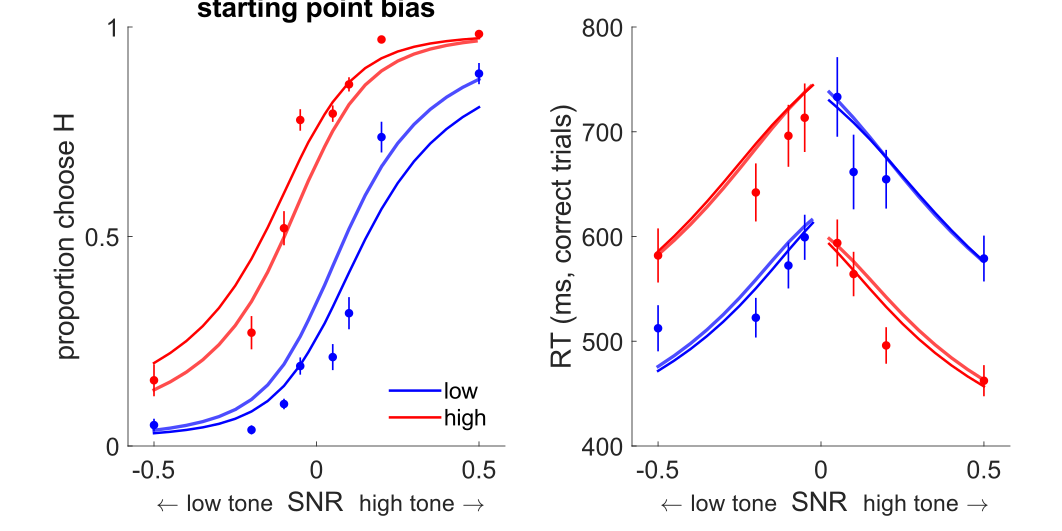

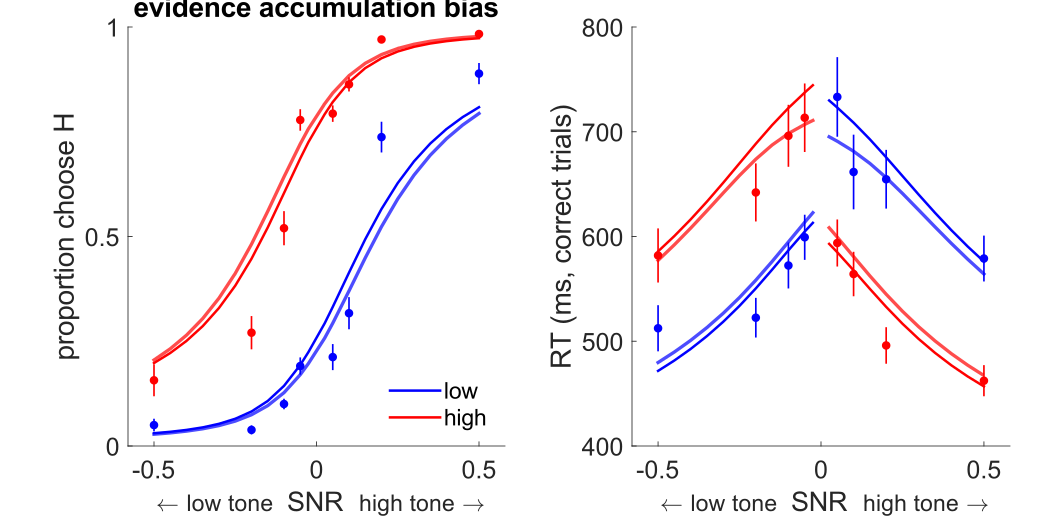

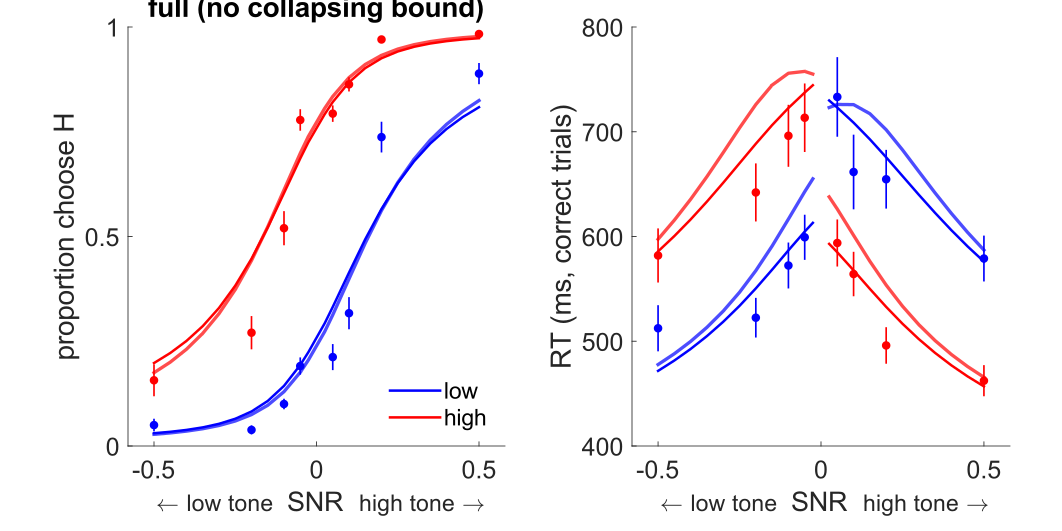

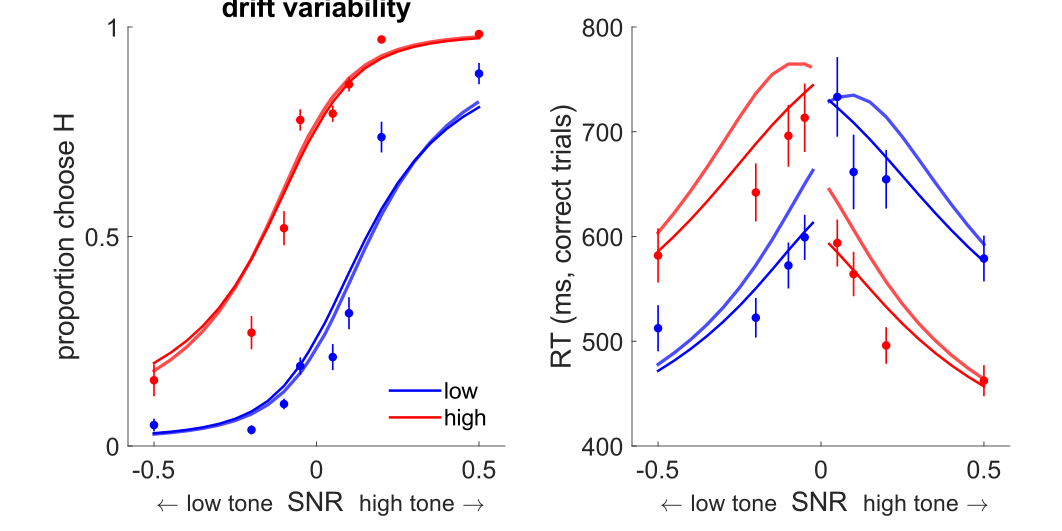

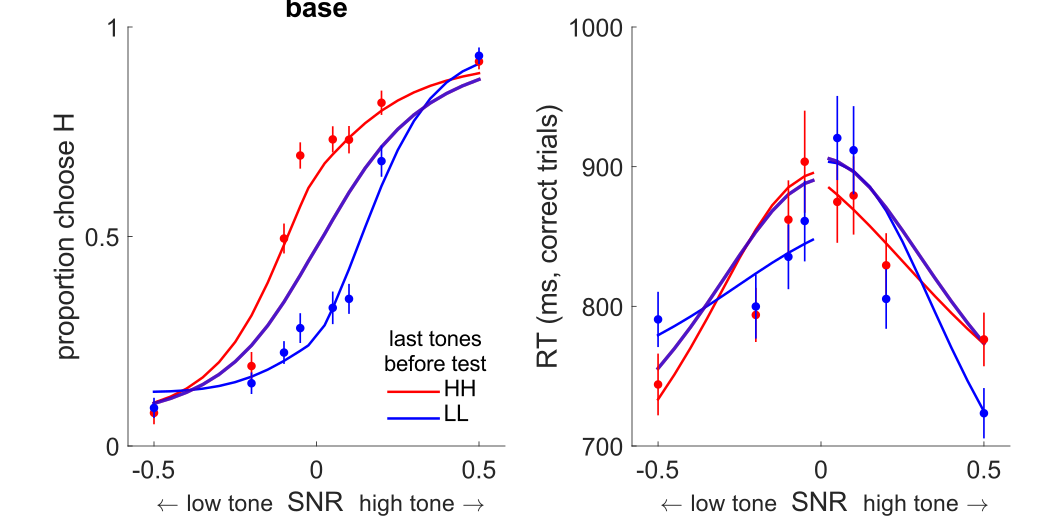

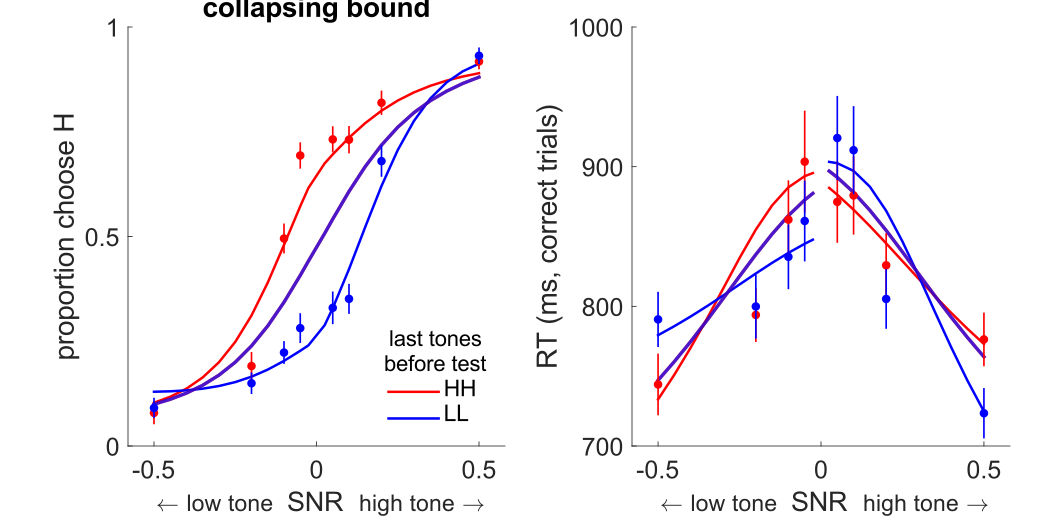

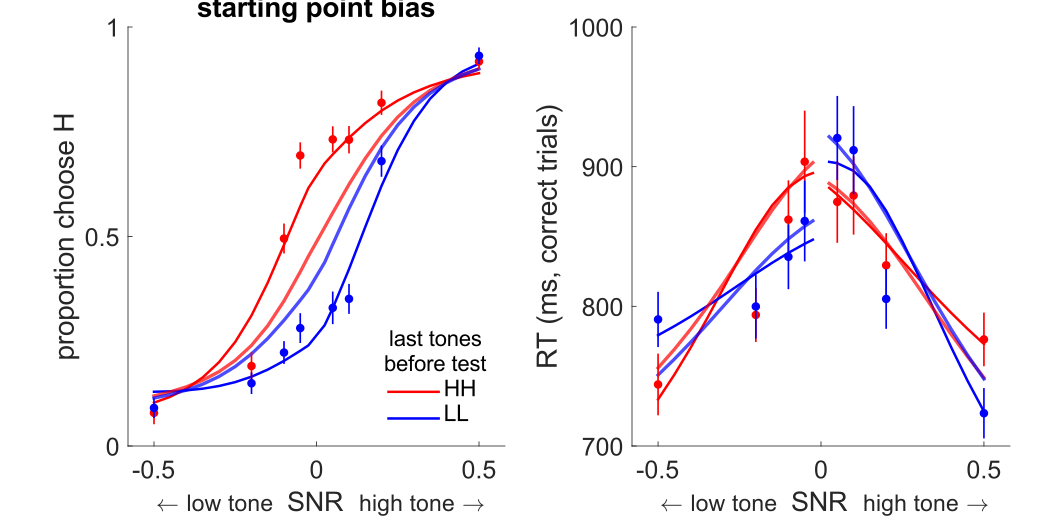

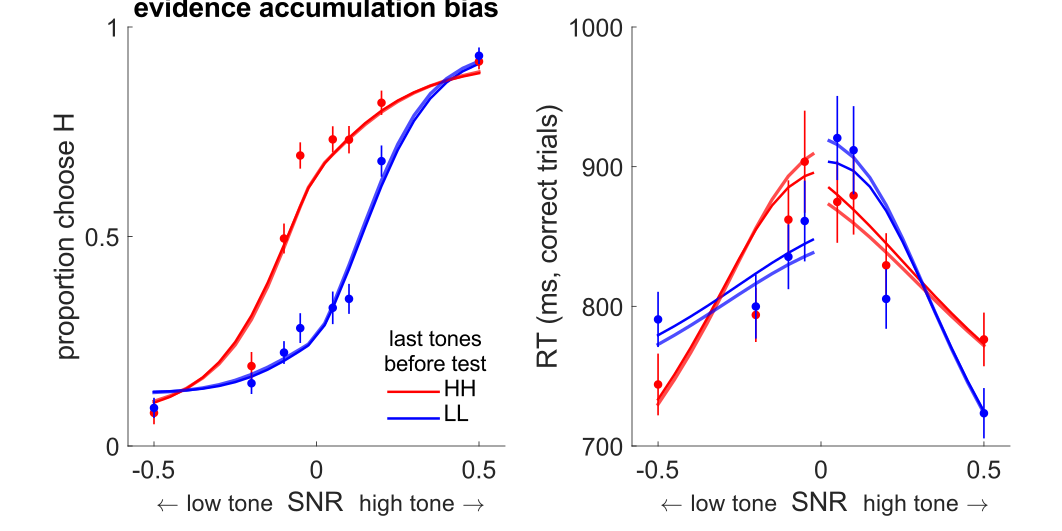

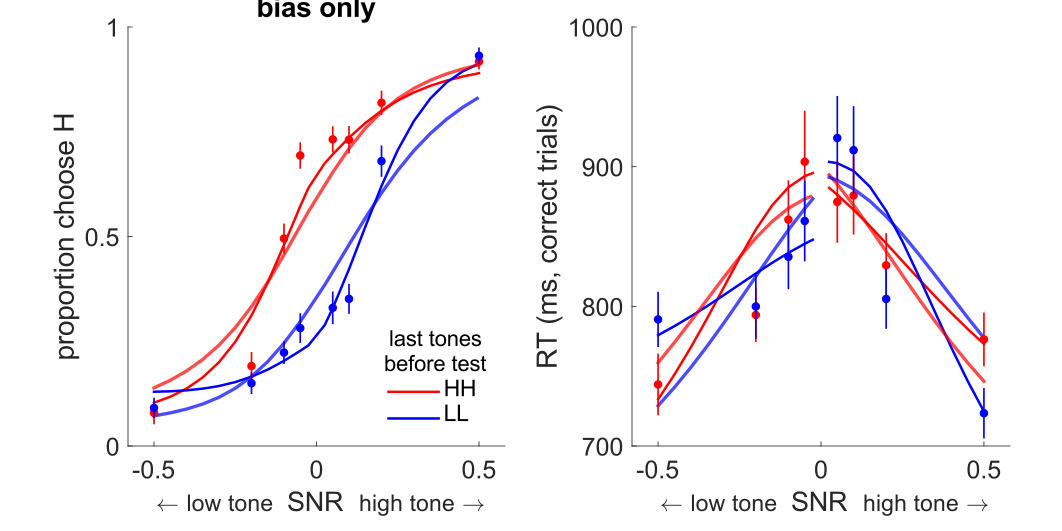

In [25]:
%FINAL
plot_full = true; %toggles whether to overlay the full model
cond_reduc = true; %toggles whether to only plot H/L precue and HH/LL pretone conditions

models_reduc = [models_pc;models_pt];
models_reduc(strcmp(models_reduc.title,'full'),:) = [];

this_figdim = [1 1 850 425];
this_subplot = @(m,n,p) subtightplot(m,n,p,.12,[.16 .05],[0.12 0.05]);
if plot_full
    mreduc_style = mline_dashed;
else
    mreduc_style = mline_style;
end
smooth_alpha = 0.7; %mline_alpha;
set(groot,'DefaultAxesFontSize',15)
set(groot,'DefaultLineLineWidth',1.5)
set(groot,'DefaultErrorBarLineWidth',1)
set(groot,'DefaultErrorBarMarkerSize',14)
set(groot,'DefaultErrorBarCapSize',0)
set(groot,'DefaultLegendBox','off')

prior_reduc = [2,-2];
ptC_reduc = {'HH','LL'};
linewidth_reduc = 2;
psycho_xlab = ' \fontsize{14}\leftarrow low tone  \fontsize{16}SNR  \fontsize{14}high tone \rightarrow';
for m=1:height(models_reduc)
    this_data = read_data_csv(fullfile(GFIT_DATA_DIR,models_reduc.data{m}));
    this_data(isnan(this_data.choice01),:) = []; %remove missing trials
    
    SNR = unique(this_data.SNR);
    
    subj_predicted = readtable(fullfile(GFIT_DIR,models_reduc.predicted_smooth{m}));
    subj_predicted.mean_RT_corr = subj_predicted.mean_RT_corr.*1000;
    subj_predicted.success = ones(height(subj_predicted),1); %not sure this is necessary but going w/ it to change as little as possible

    
    if models_reduc.pretone(m)==1
        %attach ptC column to predictions
        %we include isH b/c don't have predictions for high/low tone for all combos of bias/subject given lack of these in 
        %the true data (this only matters for no bias cases, so that outer join doesn't create condiitons not in the
        %rest of the data)
        ptC_vals = unique(this_data(:,{'subject','bias','ptC','isH'}),'rows');
        if ismember('bias',subj_predicted.Properties.VariableNames)
            subj_predicted = join(subj_predicted,ptC_vals,'Keys',{'subject','bias','isH'},'RightVariables',...
                {'ptC'});
        else
            %duplicate predictions for each ptC if model doesn't include bias
            subj_predicted = outerjoin(subj_predicted,ptC_vals,'Keys',{'subject','isH'},'MergeKeys',true);
        end
        
        %get actual proprotions of each pretone seq per subject
        subj = unique(this_data.subject);
        ptG = [];
        for s=1:length(subj)
            this_ptG = groupcounts(this_data(strcmp(this_data.subject,subj{s}),{'bias','isH'}),...
                {'bias','isH'}); 
            this_ptG.subject = repmat(subj(s),height(this_ptG),1);
            ptG = [ptG;this_ptG];
        end
        ptG.Percent = ptG.Percent./100;
        subj_predicted = join(subj_predicted,ptG,'Keys',{'subject','bias','isH'},...
            'RightVariables','Percent');
            
        if cond_reduc
            this_data(~ismember(this_data.ptC,ptC_reduc),:) = [];
            subj_predicted(~ismember(subj_predicted.ptC,ptC_reduc),:) = [];
            this_pt_color = jet4r([1,end],:);
        else
            this_pt_color = jet4r;
        end
            
        %average data effects
        psycho_ave_ptm = varfun(@nanmean,this_data,'InputVariables',{'choice01'},...
            'GroupingVariables',{'subject','ptC','SNR'});
        psycho_ave_ptm_all = summary_stats(psycho_ave_ptm,{'nanmean_choice01'},...
            {'ptC','SNR'});
        chrono_ave_ptm = varfun(@nanmean,this_data,'InputVariables',{'RT'},...
            'GroupingVariables',{'subject','ptC','success','SNR'});
        chrono_ave_ptm_all = summary_stats(chrono_ave_ptm,{'nanmean_RT'},...
            {'ptC','success','SNR'},1);  
        
        %average predicted effects
        %psycho_ave_ptmp = varfun(@nanmean,subj_predicted,'InputVariables',{'mean_chooseH'},...
        %    'GroupingVariables',{'subject','ptC','SNR'});
        %this version calculates weighted average according to actual proportions of 
        %trials for each pretone sequence. This gives the same result as
        %straight average for ptlen <= 2.
        psycho_ave_ptmp = rowfun(@(x,w) sum(x.*w)./sum(w),subj_predicted,...
            'InputVariables',{'mean_chooseH','Percent'},...
            'GroupingVariables',{'subject','ptC','SNR'},...
            'OutputVariableName','nanmean_mean_chooseH');
        psycho_ave_ptmp_all = summary_stats(psycho_ave_ptmp,{'nanmean_mean_chooseH'},...
            {'ptC','SNR'});
        %chrono_ave_ptmp = varfun(@nanmean,subj_predicted,'InputVariables',{'mean_RT_corr'},...
        %    'GroupingVariables',{'subject','ptC','success','SNR'});
        chrono_ave_ptmp = rowfun(@(x,w) sum(x.*w)./sum(w),subj_predicted,...
            'InputVariables',{'mean_RT_corr','Percent'},...
            'GroupingVariables',{'subject','ptC','success','SNR'},...
            'OutputVariableName','nanmean_mean_RT_corr');
        chrono_ave_ptmp_all = summary_stats(chrono_ave_ptmp,{'nanmean_mean_RT_corr'},...
            {'ptC','success','SNR'},1);  
            

        figure('Position',this_figdim);hold on;
        this_subplot(1,2,1)
        if plot_full
            if cond_reduc
                h_psychm_full = psycho_plot(fullm.pretone.psycho(ismember(fullm.pretone.psycho.ptC,ptC_reduc),:),...
                    'ptC',mline_style,'mean_nanmean_mean_chooseH',[]);
            else
                h_psychm_full = psycho_plot(fullm.pretone.psycho,...
                'ptC',mline_style,'mean_nanmean_mean_chooseH',[]);
            end
            [h_psychm_full.Color] = this_pt_color{:};
        end
        h_psychm = psycho_plot(psycho_ave_ptmp_all,...
            'ptC',mreduc_style,'mean_nanmean_mean_chooseH',[]);
        if plot_full
            pt_reduc_color=cellfun(@(x) [x smooth_alpha],this_pt_color,'UniformOutput',false);
            [h_psychm.Color] = pt_reduc_color{:};
            [h_psychm.LineWidth] = deal(linewidth_reduc);
        else
            [h_psychm.Color] = this_pt_color{:};
        end
        h_psych = psycho_plot(psycho_ave_ptm_all,'ptC','.');
        [h_psych.Color] = this_pt_color{:}; 
        xlabel(psycho_xlab)
        ylabel('proportion choose H')
        ylim([0 1])
        xlim([-.58 .58])
        yticks([0 .5 1])
        title(models_reduc.title{m},'Interpreter','none')
        psychpt_leg = cellstr(unique(this_data.ptC(~isundefined(this_data.ptC))));
        legendflex(psychpt_leg,'anchor',[5 5],'buffer',[-12,10],'box','off',...
            'title',{'\fontsize{13}last tones';'\fontsize{13}before test'});

        this_subplot(1,2,2)
        hold on;
        if plot_full
            if cond_reduc
                h_chronom_full = chrono_plot(fullm.pretone.chrono(ismember(fullm.pretone.chrono.ptC,ptC_reduc),:),...
                    'ptC',mline_style,'nanmean_nanmean_mean_RT_corr',[],1);
            else
                h_chronom_full = chrono_plot(fullm.pretone.chrono,'ptC',mline_style,'nanmean_nanmean_mean_RT_corr',[],1);
            end
            chrono_color(h_chronom_full,this_pt_color)
        end
        h_chronom = chrono_plot(chrono_ave_ptmp_all,'ptC',mreduc_style,'nanmean_nanmean_mean_RT_corr',[],1);
        if plot_full
            chrono_color(h_chronom,pt_reduc_color)
            [h_chronom.LineWidth] = deal(linewidth_reduc);
        else
            chrono_color(h_chronom,this_pt_color)
        end
        h_chrono = chrono_plot(chrono_ave_ptm_all,'ptC','.','nanmean_nanmean_RT','nansem_nanmean_RT',1);
        chrono_color(h_chrono,this_pt_color) 
        xlabel(psycho_xlab)
        xlim([-.58 .58])
        ylabel('RT (ms, correct trials)')
        title('');
        this_ytx = yticks(gca);
        %yticks(round(linspace(this_ytx(1),this_ytx(end),4)))
        yticks(this_ytx(1):100:this_ytx(end))
    end
    
    if models_reduc.prior(m)==1
        %duplicate predictions for each prior if model doesn't include prior
        if ~ismember('prior',subj_predicted.Properties.VariableNames)
            subj_predicted = ...
                outerjoin(subj_predicted,unique(this_data(:,{'subject','prior'}),'rows'),...
                'Keys','subject','MergeKeys',true);
        end
        
        if cond_reduc
            this_data(~ismember(this_data.prior,prior_reduc),:) = [];
            subj_predicted(~ismember(subj_predicted.prior,prior_reduc),:) = [];
        end
            
        %average data effects
        psycho_ave_priorm= varfun(@nanmean,this_data,'InputVariables',{'choice01'},...
            'GroupingVariables',{'subject','prior','SNR'});
        psycho_ave_priorm_all = summary_stats(psycho_ave_priorm,{'nanmean_choice01'},...
            {'prior','SNR'});
        chrono_ave_priorm = varfun(@nanmean,this_data,'InputVariables',{'RT'},...
            'GroupingVariables',{'subject','prior','success','SNR'});
        chrono_ave_priorm_all = summary_stats(chrono_ave_priorm,{'nanmean_RT'},...
            {'prior','success','SNR'},1);  
            
        %average predicted effects
        psycho_ave_priormp= varfun(@nanmean,subj_predicted,'InputVariables',{'mean_chooseH'},...
            'GroupingVariables',{'subject','prior','SNR'});
        psycho_ave_priormp_all = summary_stats(psycho_ave_priormp,{'nanmean_mean_chooseH'},...
            {'prior','SNR'});
        chrono_ave_priormp = varfun(@nanmean,subj_predicted,'InputVariables',{'mean_RT_corr'},...
            'GroupingVariables',{'subject','prior','success','SNR'});
        chrono_ave_priormp_all = summary_stats(chrono_ave_priormp,{'nanmean_mean_RT_corr'},...
            {'prior','success','SNR'},1);  
        
        this_psych_color = psych_color(ismember([-2 0 2],psycho_ave_priorm_all.prior));
        this_psych_leg = psych_leg(ismember([-2 0 2],psycho_ave_priorm_all.prior));

        figure('Position',this_figdim);hold on;
        this_subplot(1,2,1)
        if plot_full
            if cond_reduc
                h_psychm_full = psycho_plot(fullm.precue.psycho(ismember(fullm.precue.psycho.prior,prior_reduc),:),...
                    'prior',strcat(mline_style,this_psych_color),'mean_nanmean_mean_chooseH',[]);
            else
                h_psychm_full = psycho_plot(fullm.precue.psycho,...
                    'prior',strcat(mline_style,this_psych_color),'mean_nanmean_mean_chooseH',[]);
            end
        end
        h_psychm = psycho_plot(psycho_ave_priormp_all,...
            'prior',strcat(mreduc_style,this_psych_color),'mean_nanmean_mean_chooseH',[]);
        if plot_full
            psychm_color={h_psychm.Color};
            psychm_color=cellfun(@(x) [x smooth_alpha],psychm_color,'UniformOutput',false);
            [h_psychm.Color] = psychm_color{:};
            [h_psychm.LineWidth] = deal(linewidth_reduc);
        end
        h_psych = psycho_plot(psycho_ave_priorm_all,'prior',strcat('.',this_psych_color));
        xlabel(psycho_xlab)
        ylabel('proportion choose H')
        ylim([0 1])
        xlim([-.58 .58])
        yticks([0 .5 1])
        title(models_reduc.title{m},'Interpreter','none')
        legend(this_psych_leg,'Location','SouthEast')

        this_subplot(1,2,2)
        hold on;
        if plot_full
            if cond_reduc
                h_chronom_full = chrono_plot(fullm.precue.chrono(ismember(fullm.precue.chrono.prior,prior_reduc),:),...
                    'prior',strcat(mline_style,this_psych_color),'nanmean_nanmean_mean_RT_corr',[],1);
            else
                h_chronom_full = chrono_plot(fullm.precue.chrono,'prior',strcat(mline_style,this_psych_color),...
                    'nanmean_nanmean_mean_RT_corr',[],1);
            end
        end
        h_chronom = chrono_plot(chrono_ave_priormp_all,'prior',strcat(mreduc_style,this_psych_color),...
            'nanmean_nanmean_mean_RT_corr',[],1);
        if plot_full
            chrono_color(h_chronom,psychm_color)
            [h_chronom.LineWidth] = deal(linewidth_reduc);
        end
        h_chrono = chrono_plot(chrono_ave_priorm_all,'prior',strcat('.',this_psych_color),...
            'nanmean_nanmean_RT','nansem_nanmean_RT',1);
        xlabel(psycho_xlab)
        xlim([-.58 .58])
        ylabel('RT (ms, correct trials)')
        title('')
        this_ytx = yticks(gca);
        yticks(this_ytx(1):100:this_ytx(end))
    end
   
end

set(groot,'DefaultAxesFontSize','factory')
set(groot,'DefaultLineLineWidth','factory')
set(groot,'DefaultErrorBarLineWidth','factory')
set(groot,'DefaultErrorBarMarkerSize','factory')
set(groot,'DefaultErrorBarCapSize','factory')
set(groot,'DefaultLegendBox','factory')

## Plot fit model RT PDFs vs. empirical PDFs

Fig S2c,d

> In read_data_csv (line 16)
> In read_data_csv (line 17)


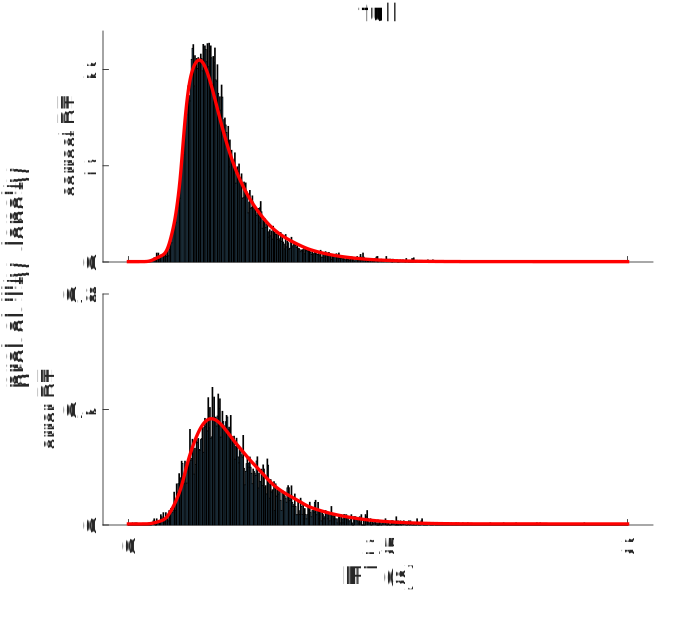

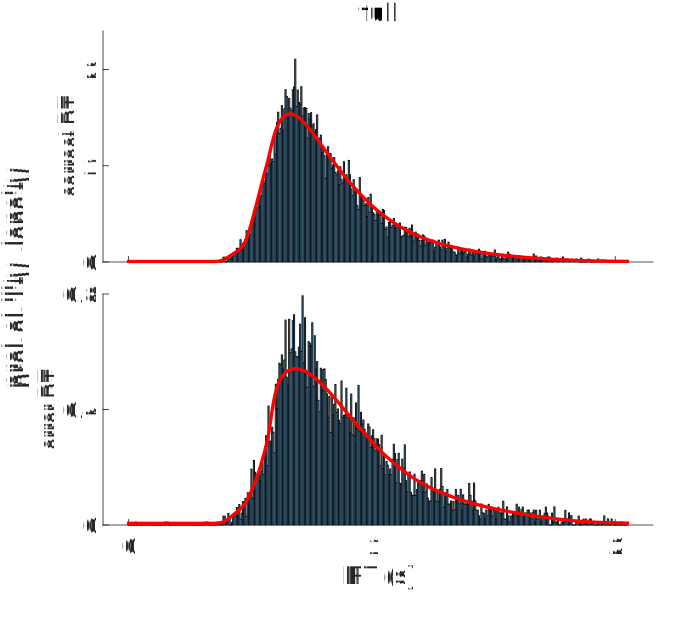

In [26]:
%this version keeps the pdf normalization as output by pyddm (i.e. they
%jointly sum to ~1)
set(groot,'DefaultAxesFontSize',15)
set(groot,'DefaultLineLineWidth',1.5)
this_subplot = @(m,n,p) subtightplot(m,n,p,.05,[.16 .05],[0.15 0.05]);

% read in priorOnly and pretoneOnly data for use in assessing fit
assert(all(strcmp(models_pc.data,models_pc.data{1})))
data_pc = read_data_csv(fullfile(GFIT_DATA_DIR,models_pc.data{1}));
data_pc(isnan(data_pc.choice01),:) = [];

assert(all(strcmp(models_pt.data,models_pt.data{1})))
data_pt = read_data_csv(fullfile(GFIT_DATA_DIR,models_pt.data{1}));
data_pt(isnan(data_pt.choice01),:) = [];

models_full = [models_pc(strcmp(models_pc.title,'full'),:);
                models_pt(strcmp(models_pt.title,'full'),:)];

pdfs_full = struct();
svars = {'precue','pretone'};
%technically we should probably do a weighted average by amount of data per subject, 
%but Ns are very close so shouldn't make much difference 
for i=1:height(models_full)
    this_pdf = readtable(fullfile(GFIT_DIR,models_full.pdfs{i}));
    %%%this_pdf = this_pdf(strcmp(this_pdf.subject,'BrB'),:); %for testing
    this_subj = unique(this_pdf.subject);

    if models_full.prior(i)==1
        this_data = data_pc;
        %%%this_data = data_pc(strcmp(data_pc.subject,'BrB'),:); %for testing
    else 
        this_data = data_pt;
        %%%this_data = data_pt(strcmp(data_pt.subject,'BrB'),:); %for testing
    end
    this_data.RT = this_data.RT./1000;
   
    this_pdf_ave = varfun(@mean,this_pdf,'InputVariables',{'pdf_corr','pdf_err'},'GroupingVariables','t_domain');
    joint_int = trapz(this_pdf_ave.t_domain,this_pdf_ave.mean_pdf_corr) + ...
        trapz(this_pdf_ave.t_domain,this_pdf_ave.mean_pdf_err);
    %fprintf('%s\n\n',abs(joint_int-1))
    assert(abs(joint_int-1) < 1e-1)
    if abs(joint_int-1) > 1e-2
        warning('Model %d averaged joint predicted pdfs missing probability density--suggests a lot of undecided trials',...
            i);
    end
    
    %get temporal variables for histograms
    dt = unique(round(diff(this_pdf_ave.t_domain),10)); %dt for model fitting
    T_dur = max(this_pdf_ave.t_domain);
    edges = (0-dt/2):dt:(T_dur+dt/2);
    
    this_pdf.pdf_corrS = nan(height(this_pdf),1);
    this_pdf.pdf_errS = nan(height(this_pdf),1);
    for s=1:length(this_subj)
        %now add the data pdfs...this is very inefficient since data are
        %shared but whatever
        %data pdfs are normalized so corr+err sum to one, like the
        %predicted pdfs
        this_datai = this_data(strcmp(this_data.subject,this_subj{s}),:);
        this_dataN = length(this_datai.RT);
        this_pdf.pdf_corrS(strcmp(this_pdf.subject,this_subj{s})) = ...
            histcounts(this_datai.RT(this_datai.success==1),edges,...
            'Normalization','countdensity')./this_dataN;
        this_pdf.pdf_errS(strcmp(this_pdf.subject,this_subj{s})) = ...
            histcounts(this_datai.RT(this_datai.success==0),edges,...
            'Normalization','countdensity')./this_dataN;
        joint_intSi = trapz(this_pdf_ave.t_domain,this_pdf.pdf_corrS(strcmp(this_pdf.subject,this_subj{s}))) + ...
            trapz(this_pdf_ave.t_domain,this_pdf.pdf_errS(strcmp(this_pdf.subject,this_subj{s})));
        assert(abs(joint_intSi)-1 < 1e-3)
    end
    this_pdfS_ave = varfun(@mean,this_pdf,'InputVariables',{'pdf_corrS','pdf_errS'},'GroupingVariables','t_domain');
    joint_intS = trapz(this_pdfS_ave.t_domain,this_pdfS_ave.mean_pdf_corrS) + ...
        trapz(this_pdfS_ave.t_domain,this_pdfS_ave.mean_pdf_errS);
    assert(abs(joint_intS-1) < 1e-3)
    
    figure('Position',[0 0 550 500]);
    this_subplot(2,1,1);hold on;
    histogram('BinCounts', this_pdfS_ave.mean_pdf_corrS, 'BinEdges', edges);
    plot(this_pdf_ave.t_domain,this_pdf_ave.mean_pdf_corr,'-r','LineWidth',2);
    title(models_full.title{i});
    ylabel('\fontsize{13}correct RT')
    if models_full.prior(i)==1
        xticks([0,1.5,3])
    else
        xticks([0,1,2])
    end
    xticklabels([]);
    yticks([0,1,2])
    ylim([0 2.4])
    this_subplot(2,1,2);hold on
    histogram('BinCounts', this_pdfS_ave.mean_pdf_errS, 'BinEdges', edges);
    plot(this_pdf_ave.t_domain,this_pdf_ave.mean_pdf_err,'-r','LineWidth',2);
    xlabel('RT (s)')
    ylabel('\fontsize{13}error RT')
    if models_full.prior(i)==1
        xticks([0,1.5,3])
    else
        xticks([0,1,2])
    end
    yticks([0,0.4,0.8])
    ylim([0 0.8])
    
    suplabel('probability density','y');
    
    %save for later plotting
    this_cond = double(models_full.prior(i)==1)+1;
    pdfs_full.(svars{this_cond}).pdfS = this_pdfS_ave;
    pdfs_full.(svars{this_cond}).pdfm = this_pdf_ave;
    pdfs_full.(svars{this_cond}).edges = edges;
    
end
set(groot,'DefaultAxesFontSize','factory')
set(groot,'DefaultLineLineWidth','factory')

#### reduced/alternative model RT distributions
Fig S1b,c

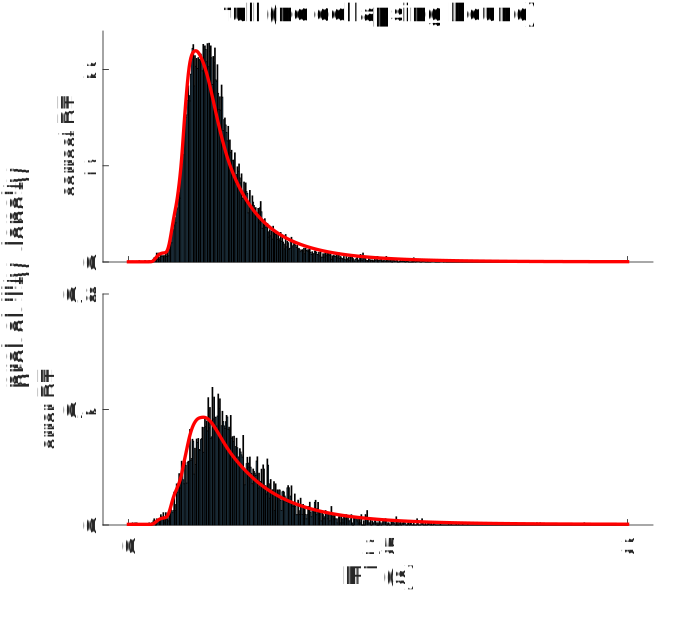

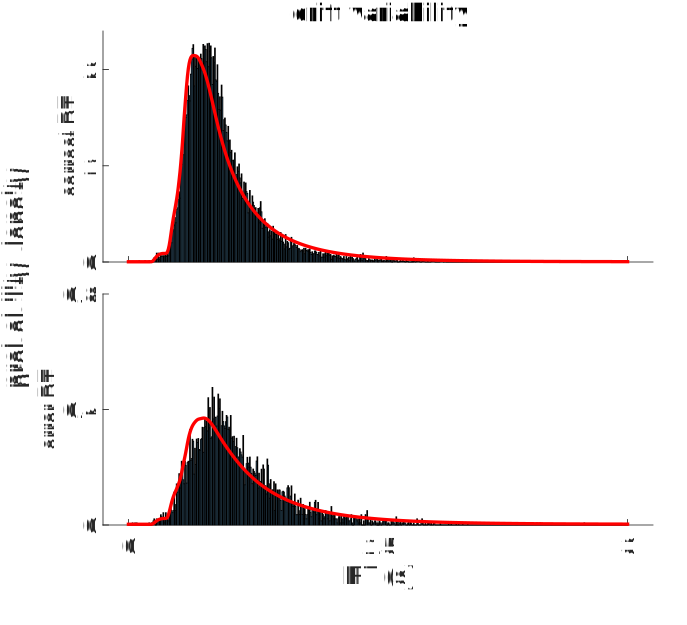

In [31]:
plot_full = false;

set(groot,'DefaultAxesFontSize',15)
set(groot,'DefaultLineLineWidth',1.5)
this_subplot = @(m,n,p) subtightplot(m,n,p,.05,[.16 .05],[0.15 0.05]);

models_reduc = [models_pc(~strcmp(models_pc.title,'full'),:);
                models_pt(~strcmp(models_pt.title,'full'),:)];
                
reduc_to_plot = {'m3-1','m3dv-1'};

if plot_full
    pdf_reduc_line = '--r';
else
    pdf_reduc_line = '-r';
end
for i=1:height(models_reduc)
    if ismember(models_reduc.name{i},reduc_to_plot)
        this_pdf = readtable(fullfile(GFIT_DIR,models_reduc.pdfs{i}));

        this_pdf_ave = varfun(@mean,this_pdf,'InputVariables',{'pdf_corr','pdf_err'},'GroupingVariables','t_domain');
        joint_int = trapz(this_pdf_ave.t_domain,this_pdf_ave.mean_pdf_corr) + ...
            trapz(this_pdf_ave.t_domain,this_pdf_ave.mean_pdf_err);
        %fprintf('%s\n\n',abs(joint_int-1))
        assert(abs(joint_int-1) < 1e-1)
        if abs(joint_int-1) > 1e-2
            warning('Model %d averaged joint predicted pdfs missing probability density--suggests a lot of undecided trials',...
                i);
        end

        this_cond = double(models_reduc.prior(i)==1)+1;
        this_pdfS_ave = pdfs_full.(svars{this_cond}).pdfS;
        this_pdf_full = pdfs_full.(svars{this_cond}).pdfm;
        this_edges = pdfs_full.(svars{this_cond}).edges;


        figure('Position',[0 0 550 500]);
        this_subplot(2,1,1);hold on;
        histogram('BinCounts', this_pdfS_ave.mean_pdf_corrS, 'BinEdges', this_edges);
        if plot_full
            h_pdf_full_corr = plot(this_pdf_full.t_domain,this_pdf_full.mean_pdf_corr,'-r','LineWidth',2);
            h_pdf_full_corr.Color = max(h_pdf_full_corr.Color-.25,0);
        end
        plot(this_pdf_ave.t_domain,this_pdf_ave.mean_pdf_corr,pdf_reduc_line,'LineWidth',2);
        title(models_reduc.title{i});
        ylabel('\fontsize{13}correct RT')
        if models_reduc.prior(i)==1
            xticks([0,1.5,3])
        else
            xticks([0,1,2])
        end
        xticklabels([]);
        yticks([0,1,2])
        ylim([0 2.4])
        this_subplot(2,1,2);hold on
        histogram('BinCounts', this_pdfS_ave.mean_pdf_errS, 'BinEdges', this_edges);
        if plot_full
            h_pdf_full_err = plot(this_pdf_full.t_domain,this_pdf_full.mean_pdf_err,'-r','LineWidth',2);
            h_pdf_full_err.Color = max(h_pdf_full_err.Color-.25,0);
        end
        plot(this_pdf_ave.t_domain,this_pdf_ave.mean_pdf_err,pdf_reduc_line,'LineWidth',2);
        xlabel('RT (s)')
        ylabel('\fontsize{13}error RT')
        if models_reduc.prior(i)==1
            xticks([0,1.5,3])
        else
            xticks([0,1,2])
        end
        yticks([0,0.4,0.8])
        ylim([0 0.8])

        suplabel('probability density','y');
    end
end
set(groot,'DefaultAxesFontSize','factory')
set(groot,'DefaultLineLineWidth','factory')

#### example subject fits for full models
Fig S2a,b

> In read_data_csv (line 16)
> In read_data_csv (line 17)


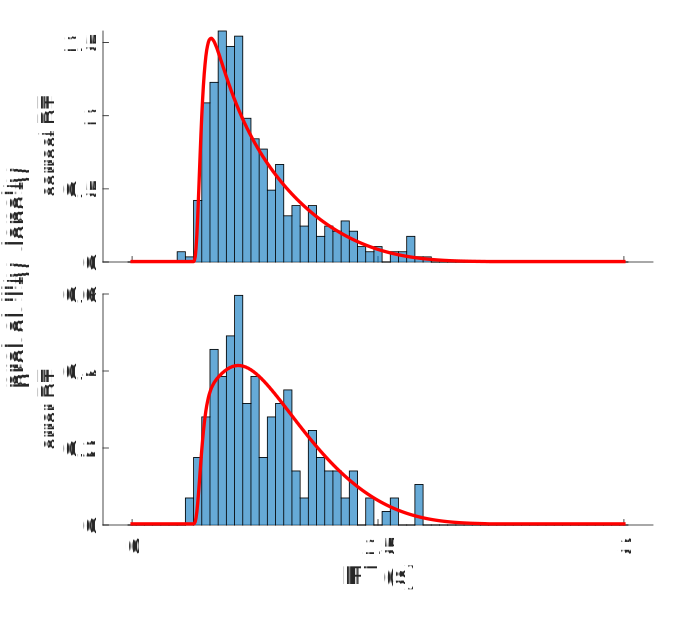

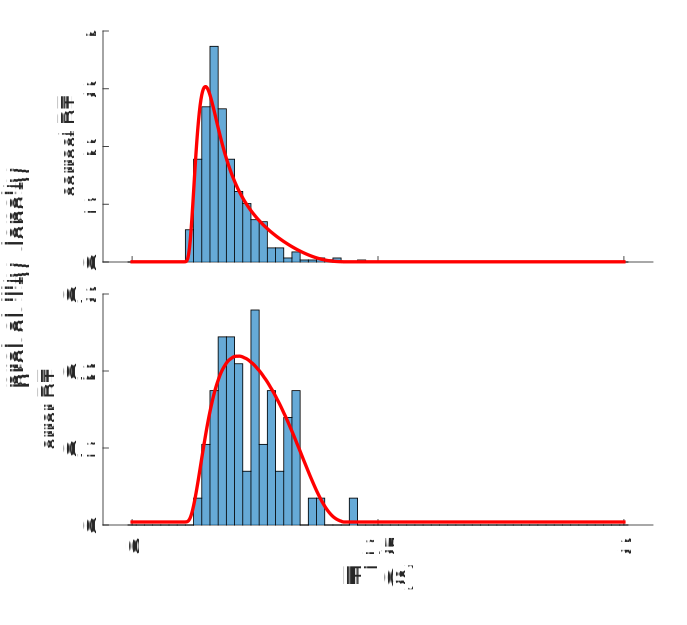

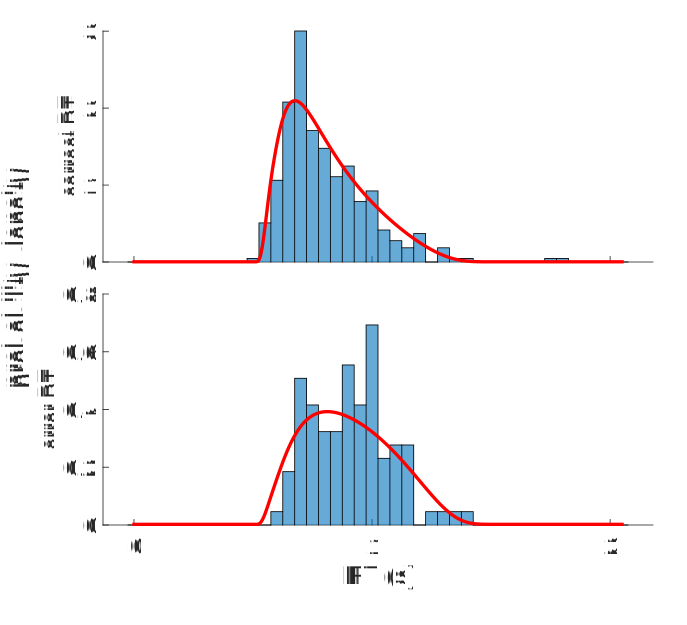

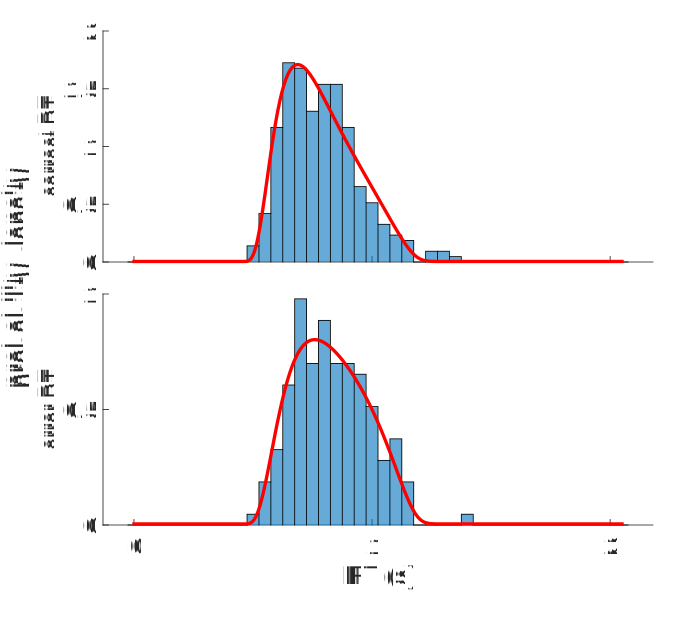

In [28]:
% now let's plot some example subjects for the full models

set(groot,'DefaultAxesFontSize',15)
set(groot,'DefaultLineLineWidth',1.5)
this_subplot = @(m,n,p) subtightplot(m,n,p,.05,[.16 .05],[0.15 0.05]);

ds_factor = 10; %downsample to get reasonable empirical distributions

for i=1:2 %height(models_block)
    this_pdf = readtable(fullfile(GFIT_DIR,models_block.pdfs{i}));
    this_subj = unique(this_pdf.subject);

    this_data = read_data_csv(fullfile(GFIT_DATA_DIR,models_block.data{i}));
    this_data(isnan(this_data.choice01),:) = [];
    this_data.RT = this_data.RT./1000;

    for s=1:length(this_subj)
        %if (i==1 && ismember(s,[7,9,16,17,26])) || (i==2 && ismember(s,[15,16,21,42])) %for plotting specific example subj
        if (i==1 && ismember(s,[17,26])) || (i==2 && ismember(s,[15,42])) %for plotting specific example subj
        
            %predicted pdf
            this_pdfi = this_pdf(strcmp(this_pdf.subject,this_subj{s}),:);
            t_domain_ds = downsample(this_pdfi.t_domain,ds_factor);
            dt = unique(round(diff(t_domain_ds),10)); 
            T_dur = max(t_domain_ds);
            if max(this_pdfi.t_domain)~=T_dur
                warning('Downsampling truncated t_domain by %.3f',max(this_pdfi.t_domain)-T_dur);
            end
            edges = (0-dt/2):dt:(T_dur+dt/2);

            %empirical pdf
            this_datai = this_data(strcmp(this_data.subject,this_subj{s}),:);
            this_dataN = length(this_datai.RT);
            this_pdf_corrS = ...
                histcounts(this_datai.RT(this_datai.success==1),edges,...
                'Normalization','countdensity')./this_dataN;
            this_pdf_errS = ...
                histcounts(this_datai.RT(this_datai.success==0),edges,...
                'Normalization','countdensity')./this_dataN;       
            joint_intSi = trapz(t_domain_ds,this_pdf_corrS) + ...
                trapz(t_domain_ds,this_pdf_errS);
            assert(abs(joint_intSi)-1 < 1e-3)

            figure('Position',[0 0 550 500]);
            this_subplot(2,1,1);hold on;
            histogram('BinCounts', this_pdf_corrS, 'BinEdges', edges);
            plot(this_pdfi.t_domain,this_pdfi.pdf_corr,'-r','LineWidth',2);
            %%%title(sprintf('%d-%s',s,this_subj{s}));
            ylabel('\fontsize{13}correct RT')
            if models_block.prior(i)==1
                xticks([0,1.5,3])
            else
                xticks([0,1,2])
            end
            xticklabels([]);
            %yticks([0,1,2])
            %ylim([0 2.4])
            this_subplot(2,1,2);hold on
            histogram('BinCounts', this_pdf_errS, 'BinEdges', edges);
            plot(this_pdfi.t_domain,this_pdfi.pdf_err,'-r','LineWidth',2);
            xlabel('RT (s)')
            ylabel('\fontsize{13}error RT')
            if models_block.prior(i)==1
                xticks([0,1.5,3])
            else
                xticks([0,1,2])
            end
            %yticks([0,0.4,0.8])
            %ylim([0 0.8])

            suplabel('probability density','y');
        end
    end
    
end
set(groot,'DefaultAxesFontSize','factory')
set(groot,'DefaultLineLineWidth','factory')